# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
# check
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t', decimal = '.')
data.info()
data['studio'].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

149

прочитали файл и узнали к какому типу данных относится каждый столбец, а также наличие в них пропусков

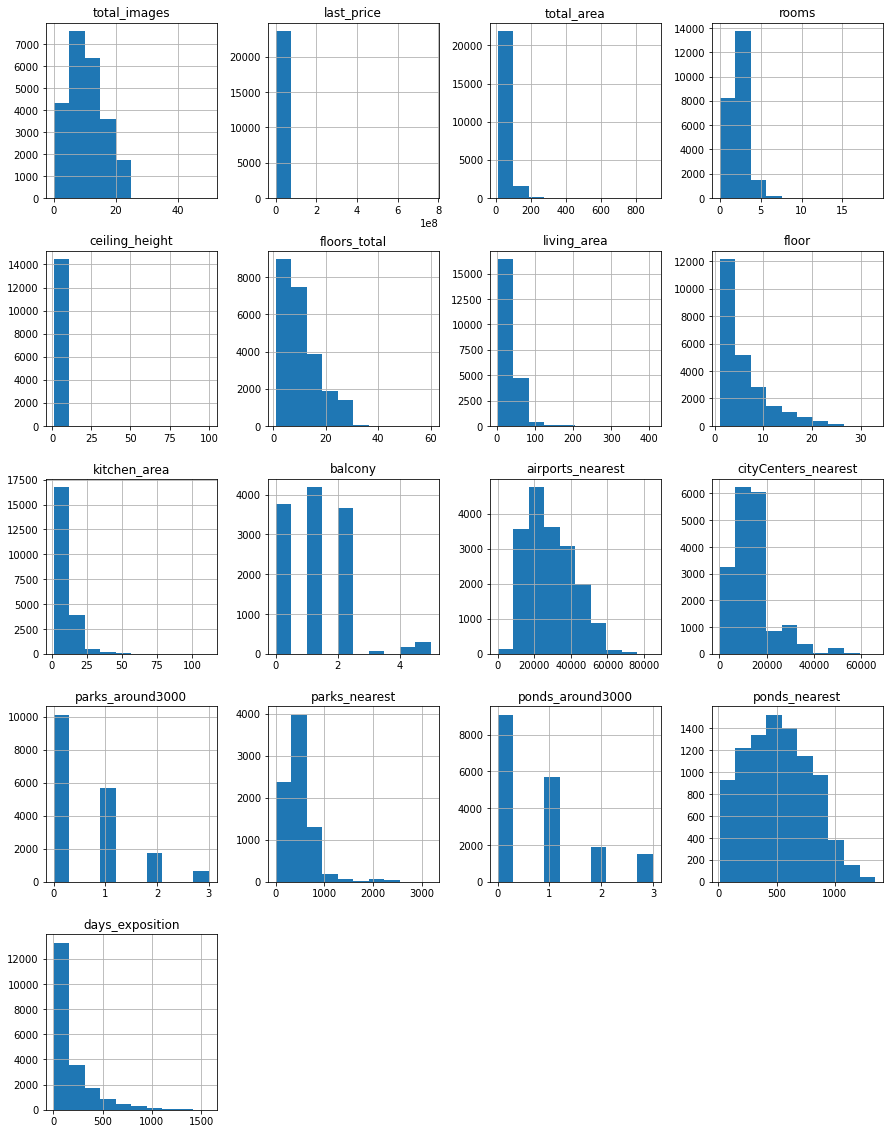

In [ ]:
data.hist(figsize = (15, 20)); # смотрим информацию по всему датасету

Вывод: Вероятнее всего в данных имеются аномалии в сторону высоких значений, этим объясняется длинный "хвост" со значениями близкими к нулю.

### Предобработка данных

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В некоторых столбцах имеются пропуски, требуется их все заполнить

In [ ]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) ')

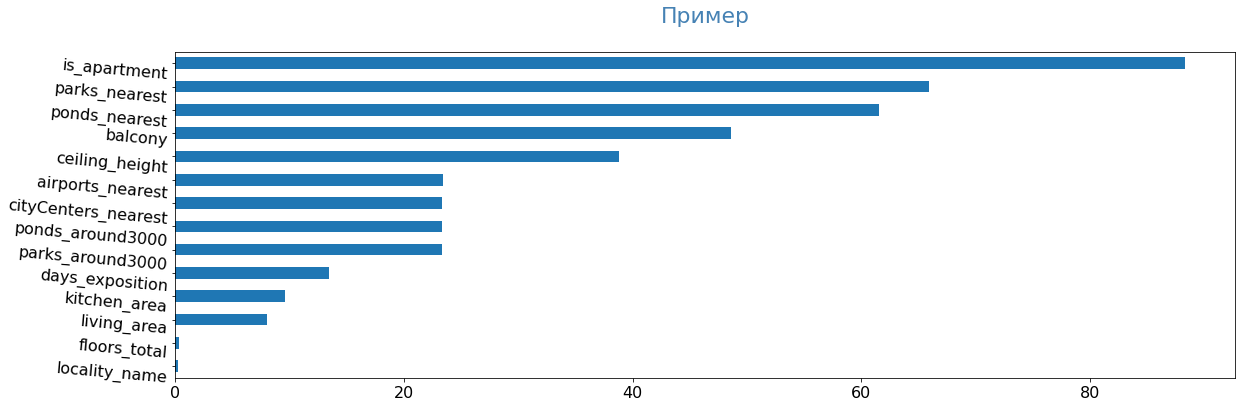

In [ ]:
pass_value_barh(data)

In [ ]:
data.loc[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


высота потолков зависит от класса объекта и зачастую связана с площадью, количеством комнат и расстоянием от центра,
поэтому требуется классифицировать данные по данным параметрам и найти среднее для каждой категориии. Данные можно поделить на несколько частей: жилье эконом-класса: высота потолков не превышает 2,5 метра. Проверим данную гипотезу.

In [ ]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


К счастью, гипотеза не подтвердилась. Можно вставлять вместо пропусков среднее значение не разделяя данные по категориям. На графиках видно, что высота потолков лежит в диапазоне от 0 до 10 метров, однако жизненный опыт указывает, что квартир с потолком выше 5 метров и ниже 2 метров соответственно не существует. Проверим данную гипотезу.

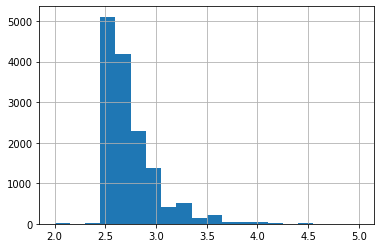

In [ ]:
data['ceiling_height'].hist(range = (2, 5), bins = 20);

Гипотеза подтвердилась, наиболее распространена выссота потолка от 2,5 метров до 3, 5.

In [ ]:
data['ceiling_height'] = \
(
    data['ceiling_height']
    .fillna(data.loc[(data['ceiling_height'] <= 3.5) & (data['ceiling_height'] >= 2.5), 'ceiling_height'].mean())
)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для того, чтобы заполнить пропуски в этажах дома нужно, в первую очередь этаж самой квартиры, если квартира на 10 этаже, то этажей в доме не может быть 5, однако нельзя утверждать обратное. Для этого нужно подробнее изучить пропуски в данных

<AxesSubplot:>

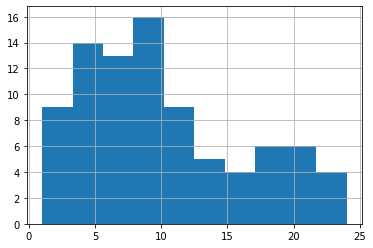

In [ ]:
data.loc[data['floors_total'].isna(), 'floor'].hist()

Судя по графику квартиры находятся с 1 по 25 этаж. Возможно, можно заполнить пропуски средним значением, если оно будет больше 25. Можно проверить данную гипотезу

In [ ]:
data['floors_total'].mean()

10.67382374115953

К сожалению, гипотеза не подтвердилась. Придется делить значения по нескольким группам и распределять квартиры по ним.
Прежде всего нужно понять как распределить значения. Для этого поочередно посчитаем средние значения.

In [ ]:
data.loc[data['floors_total'] >10, 'floors_total'].mean()

18.028102775866024

In [ ]:
data.loc[data['floors_total'] >18, 'floors_total'].mean()

23.429829890643987

In [ ]:
data.loc[data['floors_total'] >23, 'floors_total'].mean()

25.21951219512195

Итого вышло 4 категории квартир, по которым будут распределены значения.

In [ ]:
data['floor'] = data['floor'].astype(int)
data.loc[data['floor'] <= 11, 'floors_total'] = data.loc[data['floor'] <= 11, 'floors_total'].fillna(round(data['floors_total'].mean()))
data.loc[(data['floor'] > 11) & (data['floor'] <= 18), 'floors_total'] = data.loc[(data['floor'] > 11) & (data['floor'] <= 18), 'floors_total'].fillna(round(data.loc[data['floors_total'] > 11, 'floors_total'].mean()))

In [ ]:
data.loc[(data['floor'] > 18) & (data['floor'] <= 23), 'floors_total'] = data.loc[(data['floor'] > 18) & (data['floor'] <= 23), 'floors_total'].fillna(round(data.loc[data['floors_total'] > 18, 'floors_total'].mean()))
data.loc[data['floor'] > 23, 'floors_total'] = data.loc[data['floor'] > 23, 'floors_total'].fillna(round(data.loc[data['floors_total'] > 23, 'floors_total'].dropna().mean()))
#round(data.loc[data['floors_total'] > 18, 'floors_total'].mean())

На первый взгляд все нормально, ошибки нет, теперь нужно проверить наличие пропусков и соответствие этажа квартиры этажности дома

In [ ]:
display(data['floors_total'].isna().sum())
display(data.loc[data['floors_total'] < data['floor'], 'floors_total'].sum())
display(data.isna().sum())

0

0.0

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Судя по полученному результату противоречия отсутствуют. Далее нужно избавиться от пропусков в жилой площади. По матрице корреляции видно, что жилая площадь напрямую связана с общей площадью и количеством комнат. Для того, чтобы заполнить пропуски можно было бы учесть оба фактора, но это усложнит анализ и мало повлияет на конечный результат, более того, эти переменные не являются независимыми.

<AxesSubplot:>

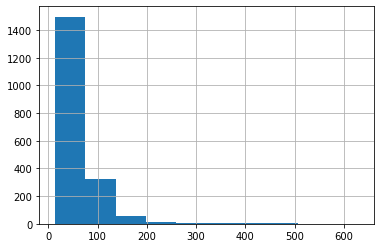

In [ ]:
data.loc[data['living_area'].isna(), 'total_area'].hist()

In [ ]:
data['total_area'].mean()

60.34865099793241

Среднюю площадь квартир также требуется разделить на группы как в прошлом шаге. Так как категорий очень много, проще записать формулу с циклом.

In [ ]:
a = round(data['total_area'].mean())
b = round(data.loc[data['total_area'] > a, 'total_area'].mean())
c = round(data.loc[data['total_area'] > b, 'total_area'].mean())
d = round(data.loc[data['total_area'] > c, 'total_area'].mean())
e = round(data.loc[data['total_area'] > d, 'total_area'].mean())
f = round(data.loc[data['total_area'] > e, 'total_area'].mean())
g = round(data.loc[data['total_area'] > f, 'total_area'].mean())
h = round(data.loc[data['total_area'] > g, 'total_area'].mean())
i = round(data.loc[data['total_area'] > h, 'total_area'].mean())
j = round(data.loc[data['total_area'] > i, 'total_area'].mean())

def category(total_area):
    if total_area <= a:
        return 'a'
    elif a < total_area <= b:
        return 'b'
    elif b < total_area <= c:
        return 'c'
    elif c < total_area <= d:
        return 'd'
    elif d < total_area <= e:
        return 'e'
    elif e < total_area <= f:
        return 'f'
    elif f < total_area <= g:
        return 'g'
    elif g < total_area <= h:
        return 'h'
    elif h < total_area <= i:
        return 'i'
    elif i < total_area <= j:
        return 'j'
data['category'] = data['total_area'].apply(category)
display(data['category'].head())
data['category'].isna().sum()

0    c
1    a
2    a
3    d
4    c
Name: category, dtype: object

0

Итого 10 категорий квартир. Далее нужно для каждой категории определить среднюю долю жилой площади от общей. Для начала рассчитаем долю жилой площади от общей для каждой квартиры. Для этого нужно добавить еще один новый столбец.

In [ ]:
data['living_area_ratio'] = data['living_area']/data['total_area']
data['living_area_ratio'].isna().sum()

1903

Далее нужно разбить квартиры по имеющимся категориям и найти среднее для каждой категории.

In [ ]:
mean_categories = data.loc[data['living_area_ratio'] > 0].groupby('category')['living_area_ratio'].mean()
mean_categories

category
a    0.550380
b    0.593305
c    0.581138
d    0.583568
e    0.614648
f    0.582353
g    0.515018
h    0.597554
i    0.540437
j    0.455222
Name: living_area_ratio, dtype: float64

Средние значения долей найдены, можно заполнять пропуски в столбце living_area.

In [ ]:
display(data.loc[data['living_area'].isna()])
data['living_area'].isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,living_area_ratio
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.706238,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,d,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.706238,24.0,NaN,22,NaN,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,b,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.706238,9.0,NaN,2,NaN,...,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,a,NaN
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.500000,5.0,NaN,1,NaN,...,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,a,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.706238,22.0,NaN,3,NaN,...,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.700000,12.0,NaN,5,NaN,...,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0,b,NaN
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.550000,10.0,NaN,1,NaN,...,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0,b,NaN
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.800000,9.0,NaN,2,NaN,...,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,a,NaN
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.706238,9.0,NaN,4,NaN,...,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,a,NaN


1903

In [ ]:
def mean_category(category):
    if category == 'a':
        return mean_categories[0]
    elif category == 'b':
        return mean_categories[1]
    elif category == 'c':
        return mean_categories[2]
    elif category == 'd':
        return mean_categories[3]
    elif category == 'e':
        return mean_categories[4]
    elif category == 'f':
        return mean_categories[5]
    elif category == 'g':
        return mean_categories[6]
    elif category == 'h':
        return mean_categories[7]
    elif category == 'i':
        return mean_categories[8]
    elif category == 'j':
        return mean_categories[9]
data['mean_categories'] = data['category'].apply(mean_category)
display(data['mean_categories'].head())

0    0.581138
1    0.550380
2    0.550380
3    0.583568
4    0.581138
Name: mean_categories, dtype: float64

После присвоения категориям средних долей можно рассчитывать жилую площадь.

In [ ]:
data.loc[data['category'] == 'a', 'living_area'] = data.loc[data['category'] == 'a', 'living_area'].fillna(round(data['mean_categories']*data['total_area']))
data.loc[data['category'] == 'b', 'living_area'] = data.loc[data['category'] == 'b', 'living_area'].fillna(round(data['mean_categories']*data['total_area']))
data.loc[data['category'] == 'c', 'living_area'] = data.loc[data['category'] == 'c', 'living_area'].fillna(round(data['mean_categories']*data['total_area']))
data.loc[data['category'] == 'd', 'living_area'] = data.loc[data['category'] == 'd', 'living_area'].fillna(round(data['mean_categories']*data['total_area']))
data.loc[data['category'] == 'e', 'living_area'] = data.loc[data['category'] == 'e', 'living_area'].fillna(round(data['mean_categories']*data['total_area']))
data.loc[data['category'] == 'f', 'living_area'] = data.loc[data['category'] == 'f', 'living_area'].fillna(round(data['mean_categories']*data['total_area']))
data.loc[data['category'] == 'g', 'living_area'] = data.loc[data['category'] == 'g', 'living_area'].fillna(round(data['mean_categories']*data['total_area']))
data.loc[data['category'] == 'h', 'living_area'] = data.loc[data['category'] == 'h', 'living_area'].fillna(round(data['mean_categories']*data['total_area']))
data.loc[data['category'] == 'i', 'living_area'] = data.loc[data['category'] == 'i', 'living_area'].fillna(round(data['mean_categories']*data['total_area']))
data.loc[data['category'] == 'j', 'living_area'] = data.loc[data['category'] == 'j', 'living_area'].fillna(round(data['mean_categories']*data['total_area']))
display(data.head(10))
display(data.loc[data['living_area'] > data['total_area'], 'living_area'].sum())
data.isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,living_area_ratio,mean_categories
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.00,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,c,0.472222,0.581138
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.706238,11.0,18.60,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,a,0.460396,0.550380
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.706238,5.0,34.30,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,a,0.612500,0.550380
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.706238,14.0,93.00,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,d,NaN,0.583568
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.00,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,c,0.320000,0.581138
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.706238,12.0,14.40,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,a,0.473684,0.550380
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.706238,26.0,10.60,6,NaN,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,a,0.284182,0.550380
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.706238,24.0,42.00,22,NaN,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,b,NaN,0.593305
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.706238,27.0,15.43,26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,a,0.465320,0.550380
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9.0,43.60,7,NaN,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,b,0.714754,0.593305


0.0

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
category                    0
living_area_ratio        1903
mean_categories             0
dtype: int64

Противоречия отсутствуют, все пропуски заполнены. Нужно перезаполнить пропуски в столбце living_area_ratio.

In [ ]:
data['living_area_ratio'] = data['living_area']/data['total_area']
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,living_area_ratio,mean_categories
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.00,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,c,0.472222,0.581138
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.706238,11.0,18.60,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,a,0.460396,0.550380
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.706238,5.0,34.30,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,a,0.612500,0.550380
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.706238,14.0,93.00,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,d,0.584906,0.583568
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.00,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,c,0.320000,0.581138
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.706238,12.0,14.40,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,a,0.473684,0.550380
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.706238,26.0,10.60,6,NaN,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,a,0.284182,0.550380
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.706238,24.0,42.00,22,NaN,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,b,0.586592,0.593305
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.706238,27.0,15.43,26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,a,0.465320,0.550380
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9.0,43.60,7,NaN,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,b,0.714754,0.593305


Если в объявлении не указано, что квартира является апартаментами, то вероятнее всего она ею не является. Проверить это невозможно, не взглянув на документы, но будем исходить из логики покупателя, который будет просматривать объявления и проставим во всех пропусках False.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

Далее требуется выяснить с чем связаны пропуски в площади кухни. Предположительно, студии не имеют кухни, так как они объединены с жилой площадью. Также кухня может полностью отсутствовать в апартаментах. Проверим данные гипотезы.

In [ ]:
data.loc[data['studio'] == True, 'studio'].sum()
len(data.loc[data['studio'] == True, 'kitchen_area'])
display(data.loc[data['studio'] == True, 'studio'].sum(), data.loc[data['studio'] == True, 'kitchen_area'].isna().sum())
#.pivot_table(index = 'kitchen_area', columns = ['is_apartment', 'studio'])

149

149

Первая гипотеза подтвердилась, можно заполнять столбец нулями. Далее следует выяснить, влияют ли на пропуски в данных тип жилья "апартаменты".

In [ ]:
data.loc[data['studio'] == True, 'kitchen_area'] = data.loc[data['studio'] == True, 'kitchen_area'].fillna(0)
data['kitchen_area']

0        25.00
1        11.00
2         8.30
3          NaN
4        41.00
         ...  
23694    13.83
23695     8.50
23696      NaN
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

In [ ]:
data['kitchen_area'].isna().sum()

2129

In [ ]:
#data.loc[data['is_apartment'] == True, 'is_apartment'].sum()
#len(data.loc[data['is_apartment'] == True, 'kitchen_area'])
display(data.loc[data['is_apartment'] == True, 'is_apartment'].sum(), data.loc[data['is_apartment'] == True, 'kitchen_area'].isna().sum())

50

15

Гипотеза не подтвердилась. Нужно заполнять средним значением как в жилой площади.

In [ ]:
data['kitchen_area_ratio'] = data['kitchen_area']/data['total_area']
data['living_area_ratio'].isna().sum()

0

 Добавили столбец с долями площадей кухни для каждой квартиры.

In [ ]:
mean_categories_kitchen = data.loc[data['kitchen_area_ratio'] > 0].groupby('category')['kitchen_area_ratio'].mean()

In [ ]:
def mean_category_kitchen(category):
    if category == 'a':
        return mean_categories_kitchen[0]
    elif category == 'b':
        return mean_categories_kitchen[1]
    elif category == 'c':
        return mean_categories_kitchen[2]
    elif category == 'd':
        return mean_categories_kitchen[3]
    elif category == 'e':
        return mean_categories_kitchen[4]
    elif category == 'f':
        return mean_categories_kitchen[5]
    elif category == 'g':
        return mean_categories_kitchen[6]
    elif category == 'h':
        return mean_categories_kitchen[7]
    elif category == 'i':
        return mean_categories_kitchen[8]
    elif category == 'j':
        return mean_categories_kitchen[9]
data['mean_categories_kitchen'] = data['category'].apply(mean_category_kitchen)
display(data['mean_categories_kitchen'].head())

0    0.159711
1    0.204969
2    0.204969
3    0.142087
4    0.159711
Name: mean_categories_kitchen, dtype: float64

In [ ]:
data.loc[data['category'] == 'a', 'kitchen_area'] = data.loc[data['category'] == 'a', 'kitchen_area'].fillna(round(data['mean_categories_kitchen']*data['total_area']))
data.loc[data['category'] == 'b', 'kitchen_area'] = data.loc[data['category'] == 'b', 'kitchen_area'].fillna(round(data['mean_categories_kitchen']*data['total_area']))
data.loc[data['category'] == 'c', 'kitchen_area'] = data.loc[data['category'] == 'c', 'kitchen_area'].fillna(round(data['mean_categories_kitchen']*data['total_area']))
data.loc[data['category'] == 'd', 'kitchen_area'] = data.loc[data['category'] == 'd', 'kitchen_area'].fillna(round(data['mean_categories_kitchen']*data['total_area']))
data.loc[data['category'] == 'e', 'kitchen_area'] = data.loc[data['category'] == 'e', 'kitchen_area'].fillna(round(data['mean_categories_kitchen']*data['total_area']))
data.loc[data['category'] == 'f', 'kitchen_area'] = data.loc[data['category'] == 'f', 'kitchen_area'].fillna(round(data['mean_categories_kitchen']*data['total_area']))
data.loc[data['category'] == 'g', 'kitchen_area'] = data.loc[data['category'] == 'g', 'kitchen_area'].fillna(round(data['mean_categories_kitchen']*data['total_area']))
data.loc[data['category'] == 'h', 'kitchen_area'] = data.loc[data['category'] == 'h', 'kitchen_area'].fillna(round(data['mean_categories_kitchen']*data['total_area']))
data.loc[data['category'] == 'i', 'kitchen_area'] = data.loc[data['category'] == 'i', 'kitchen_area'].fillna(round(data['mean_categories_kitchen']*data['total_area']))
data.loc[data['category'] == 'j', 'kitchen_area'] = data.loc[data['category'] == 'j', 'kitchen_area'].fillna(round(data['mean_categories_kitchen']*data['total_area']))
display(data.head(10))
display(data.loc[data['kitchen_area'] > data['total_area'], 'kitchen_area'].sum())
data.isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,living_area_ratio,mean_categories,kitchen_area_ratio,mean_categories_kitchen
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,c,0.472222,0.581138,0.231481,0.159711
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.706238,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,a,0.460396,0.550380,0.272277,0.204969
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.706238,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,a,0.612500,0.550380,0.148214,0.204969
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.706238,14.0,93.00,9,False,...,2.0,84.0,3.0,234.0,424.0,d,0.584906,0.583568,NaN,0.142087
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,c,0.320000,0.581138,0.410000,0.159711
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.706238,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,a,0.473684,0.550380,0.299342,0.204969
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.706238,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,a,0.284182,0.550380,0.386059,0.204969
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.706238,24.0,42.00,22,False,...,0.0,NaN,0.0,NaN,NaN,b,0.586592,0.593305,0.263966,0.159293
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.706238,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,a,0.465320,0.550380,0.265682,0.204969
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,b,0.714754,0.593305,0.106557,0.159293


0.0

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                    11519
locality_name                 49
airports_nearest            5542
cityCenters_nearest         5519
parks_around3000            5518
parks_nearest              15620
ponds_around3000            5518
ponds_nearest              14589
days_exposition             3181
category                       0
living_area_ratio              0
mean_categories                0
kitchen_area_ratio          2129
mean_categories_kitchen        0
dtype: int64

In [ ]:
data['kitchen_area_ratio'] = data['kitchen_area']/data['total_area']
data['living_area_ratio'].isna().sum()

0

Проверим не противоречат ли полученные значения здравому смыслу. Так как в датасете отсутствует информация о санузле, площади коридора и другие и выделим на них условные 10% от общей площади. Получается жилая площадь и площадь кухни не должны превышать 90% от общей площади.

In [ ]:
data.loc[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,living_area_ratio,mean_categories,kitchen_area_ratio,mean_categories_kitchen
41,16,7900000.0,74.00,2016-05-04T00:00:00,3,2.706238,14.0,59.00,8,False,...,1.0,725.0,1.0,759.0,179.0,b,0.797297,0.593305,0.162162,0.159293
171,6,3800000.0,49.00,2019-02-22T00:00:00,2,2.500000,9.0,38.00,8,False,...,0.0,NaN,0.0,NaN,11.0,a,0.775510,0.550380,0.204082,0.204969
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.650000,9.0,26.10,5,False,...,0.0,NaN,1.0,824.0,12.0,a,0.864238,0.550380,0.205298,0.204969
220,8,3890000.0,37.00,2018-07-09T00:00:00,1,2.500000,25.0,28.00,6,False,...,0.0,NaN,0.0,NaN,28.0,a,0.756757,0.550380,0.243243,0.204969
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.706238,11.0,20.75,1,False,...,0.0,NaN,1.0,374.0,251.0,a,0.738434,0.550380,0.213523,0.204969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23328,12,4299000.0,54.00,2016-11-25T00:00:00,2,2.706238,14.0,40.00,8,False,...,0.0,NaN,0.0,NaN,343.0,a,0.740741,0.550380,0.185185,0.204969
23521,13,8500000.0,65.00,2018-11-01T00:00:00,2,2.706238,4.0,44.00,2,False,...,1.0,627.0,0.0,NaN,NaN,b,0.676923,0.593305,0.235385,0.159293
23579,7,2350000.0,24.80,2018-06-07T00:00:00,1,2.706238,10.0,18.00,2,False,...,NaN,NaN,NaN,NaN,89.0,a,0.725806,0.550380,0.201613,0.204969
23680,14,5000000.0,59.00,2019-04-04T00:00:00,3,2.500000,5.0,52.00,1,False,...,0.0,NaN,0.0,NaN,NaN,a,0.881356,0.550380,0.118644,0.204969


658 аномалии довольно много, удалять эти значения не очень хочется, потому что мы еще в самом начале анализа и если будем каждый раз удалять значения, которые нам не очень нравятся, мы можем очень сильно исказить итоговую выборку. Гораздо более оптимальным вариантом представляется приведение аномальных значений к нужным.
Можно рассчитать сумму превышения фактического значения над максимально возможным, а затем на эту сумму уменьшить размер жилой площади. Конечно, это выглядит странным на фоне того, что жилая площадь является более стабильным показателем в отличие от кухни, но следует учитывать, что, во первых площадь кухни меньше и если попытаться ее изменить можно придти к неадекватным числам, а во вторых жизненный опыт подсказывает, что вне зависимости от площади квартиры площади кухонь у всех одинаковые.

In [ ]:
def anomalies(anomalies):
    if anomalies['total_area']*0.9 < (anomalies['living_area'] + anomalies['kitchen_area']):
        anomalies['living_area'] = (anomalies['total_area']*0.9 - anomalies['kitchen_area']-1)
        return anomalies['living_area']
    else:
        return anomalies['living_area']
data['living_area'] = data.apply(anomalies, axis = 1)

In [ ]:
data['living_area'].isna().sum()

0

Противоречия отсутствуют, пропуски также. Если не указано количество балконов, то нужно заполнить пропуски нулями.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Пропуски в заименовании локации заполнить невозможно, строки останутся пустыми. Пропуск в расстоянии до аэропорта может быть связан с отсутствием аэропортов в городе. Проверим данную гипотезу. Узнаем квартиры из каких районов присутствуют в датасете.

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В данных довольно много локаций. Нужно составить сводную таблицу с наименованиями и расстоянием до аэропорта.

In [ ]:
data_pivot = data.pivot_table(index = 'locality_name', values = 'airports_nearest', aggfunc = 'sum')
no_airport = data_pivot.loc[data_pivot['airports_nearest'] == 0]
display(data_pivot, no_airport)

,airports_nearest
locality_name,
Бокситогорск,0.0
Волосово,0.0
Волхов,0.0
Всеволожск,0.0
Выборг,0.0
...,...
село Путилово,0.0
село Рождествено,0.0
село Русско-Высоцкое,0.0


,airports_nearest
locality_name,
Бокситогорск,0.0
Волосово,0.0
Волхов,0.0
Всеволожск,0.0
Выборг,0.0
...,...
село Путилово,0.0
село Рождествено,0.0
село Русско-Высоцкое,0.0


Судя по данным во многих регионах нет аэропортов, поэтому там пропуски. Заполним их нулями.

In [ ]:
data.loc[data['locality_name'].isin(no_airport.index), 'airports_nearest'] = data.loc[data['locality_name'].isin(no_airport.index), 'airports_nearest'].fillna(0)
display(data['airports_nearest'].isna().sum())

156

От основной части пропусков мы избавились. Осталось выяснить что делать с оставшимися пропусками. Взглянем на обновленный датасет.

In [ ]:
data.loc[data['airports_nearest'].isna(), 'is_apartment':'mean_categories_kitchen']

,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,living_area_ratio,mean_categories,kitchen_area_ratio,mean_categories_kitchen
66,False,False,False,11.5,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,186.0,a,0.511765,0.550380,0.338235,0.204969
81,False,False,False,11.0,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b,0.588235,0.593305,0.161765,0.159293
593,False,False,False,10.1,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,0.516971,0.550380,0.263708,0.204969
604,False,False,False,15.0,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c,0.613861,0.581138,0.148515,0.159711
608,False,True,False,0.0,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,a,0.560000,0.550380,0.000000,0.204969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22717,False,False,False,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,a,0.457143,0.550380,0.285714,0.204969
22790,False,False,False,11.0,1.0,Санкт-Петербург,NaN,13355.0,1.0,735.0,0.0,NaN,10.0,a,0.446809,0.550380,0.234043,0.204969
23022,False,False,False,12.0,0.0,посёлок Щеглово,NaN,NaN,NaN,NaN,NaN,NaN,53.0,a,0.541379,0.550380,0.206897,0.204969
23124,False,False,False,6.0,0.0,Санкт-Петербург,NaN,11246.0,0.0,NaN,0.0,NaN,23.0,a,0.714286,0.550380,0.145278,0.204969


In [ ]:
data.loc[data['airports_nearest'].isna(), 'locality_name'].unique()

array(['поселок Мурино', 'Санкт-Петербург', 'посёлок Шушары', nan,
       'посёлок Щеглово', 'Красное Село', 'Ломоносов', 'Кронштадт',
       'Колпино'], dtype=object)

В данных обнаружена локация без наименования. Присвоим ей значение: "другой"

In [ ]:
data['locality_name'] = data['locality_name'].fillna('Другой')
data.loc[data['airports_nearest'].isna(), 'locality_name'].unique()

array(['поселок Мурино', 'Санкт-Петербург', 'посёлок Шушары', 'Другой',
       'посёлок Щеглово', 'Красное Село', 'Ломоносов', 'Кронштадт',
       'Колпино'], dtype=object)

In [ ]:
data.loc[data['locality_name'] == 'поселок Мурино', 'airports_nearest'] = data.loc[data['locality_name'] == 'поселок Мурино', 'airports_nearest'].fillna(data.loc[(data['locality_name'] == 'поселок Мурино') & (data['airports_nearest'] > 0), 'airports_nearest'].median())
data.loc[data['locality_name'] == 'Санкт-Петербург', 'airports_nearest'] = data.loc[data['locality_name'] == 'Санкт-Петербург', 'airports_nearest'].fillna(data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['airports_nearest'] > 0), 'airports_nearest'].median())
data.loc[data['locality_name'] == 'посёлок Шушары', 'airports_nearest'] = data.loc[data['locality_name'] == 'посёлок Шушары', 'airports_nearest'].fillna(data.loc[(data['locality_name'] == 'посёлок Шушары') & (data['airports_nearest'] > 0), 'airports_nearest'].median())
data.loc[data['locality_name'] == 'Другой', 'airports_nearest'] = data.loc[data['locality_name'] == 'Другой', 'airports_nearest'].fillna(data.loc[(data['locality_name'] == 'Другой') & (data['airports_nearest'] > 0), 'airports_nearest'].median())
data.loc[data['locality_name'] == 'посёлок Щеглово', 'airports_nearest'] = data.loc[data['locality_name'] == 'посёлок Щеглово', 'airports_nearest'].fillna(data.loc[(data['locality_name'] == 'посёлок Щеглово') & (data['airports_nearest'] > 0), 'airports_nearest'].median())
data.loc[data['locality_name'] == 'Красное Село', 'airports_nearest'] = data.loc[data['locality_name'] == 'Красное Село', 'airports_nearest'].fillna(data.loc[(data['locality_name'] == 'Красное Село') & (data['airports_nearest'] > 0), 'airports_nearest'].median())
data.loc[data['locality_name'] == 'Ломоносов', 'airports_nearest'] = data.loc[data['locality_name'] == 'Ломоносов', 'airports_nearest'].fillna(data.loc[(data['locality_name'] == 'Ломоносов') & (data['airports_nearest'] > 0), 'airports_nearest'].median())
data.loc[data['locality_name'] == 'Кронштадт', 'airports_nearest'] = data.loc[data['locality_name'] == 'Кронштадт', 'airports_nearest'].fillna(data.loc[(data['locality_name'] == 'Кронштадт') & (data['airports_nearest'] > 0), 'airports_nearest'].median())
data.loc[data['locality_name'] == 'Колпино', 'airports_nearest'] = data.loc[data['locality_name'] == 'Колпино', 'airports_nearest'].fillna(data.loc[(data['locality_name'] == 'Колпино') & (data['airports_nearest'] > 0), 'airports_nearest'].median())
data['airports_nearest'].isna().sum()

0

Далее нужно заполнить пропуски в столбце с расстоянием до центра города. Логично, что пропуски могут быть в поселках и подобных населенных пунктах. Проверим гипотезу.

In [ ]:
data.loc[data['cityCenters_nearest'].isna(), 'locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

In [ ]:
data_pivot = data.pivot_table(index = 'locality_name', values = 'cityCenters_nearest', aggfunc = 'sum')
not_city = data_pivot.loc[data_pivot['cityCenters_nearest'] == 0]
display(data_pivot, not_city)

,cityCenters_nearest
locality_name,
Бокситогорск,0.0
Волосово,0.0
Волхов,0.0
Всеволожск,0.0
Выборг,0.0
...,...
село Путилово,0.0
село Рождествено,0.0
село Русско-Высоцкое,0.0


,cityCenters_nearest
locality_name,
Бокситогорск,0.0
Волосово,0.0
Волхов,0.0
Всеволожск,0.0
Выборг,0.0
...,...
село Путилово,0.0
село Рождествено,0.0
село Русско-Высоцкое,0.0


In [ ]:
data.loc[data['locality_name'].isin(not_city.index), 'cityCenters_nearest'] = \
data.loc[data['locality_name'].isin(not_city.index), 'cityCenters_nearest'].fillna(0)
display(data['cityCenters_nearest'].isna().sum())

133

In [ ]:
data.loc[data['cityCenters_nearest'].isna(), 'locality_name'].unique()

array(['поселок Мурино', 'Санкт-Петербург', 'посёлок Шушары', 'Другой',
       'посёлок Щеглово', 'Красное Село', 'Ломоносов', 'Кронштадт',
       'Пушкин', 'Колпино'], dtype=object)

In [ ]:
data.loc[data['locality_name'] == 'поселок Мурино', 'cityCenters_nearest'] = \
data.loc[data['locality_name'] == 'поселок Мурино', 'cityCenters_nearest'].fillna(data.loc[(data['locality_name'] == 'поселок Мурино') & (data['cityCenters_nearest'] > 0), 'cityCenters_nearest'].median())
data.loc[data['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'] = \
data.loc[data['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'].fillna(data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'] > 0), 'cityCenters_nearest'].median())
data.loc[data['locality_name'] == 'посёлок Шушары', 'cityCenters_nearest'] = \
data.loc[data['locality_name'] == 'посёлок Шушары', 'cityCenters_nearest'].fillna(data.loc[(data['locality_name'] == 'посёлок Шушары') & (data['cityCenters_nearest'] > 0), 'cityCenters_nearest'].median())
data.loc[data['locality_name'] == 'Другой', 'cityCenters_nearest'] = \
data.loc[data['locality_name'] == 'Другой', 'cityCenters_nearest'].fillna(data.loc[(data['locality_name'] == 'Другой') & (data['cityCenters_nearest'] > 0), 'cityCenters_nearest'].median())
data.loc[data['locality_name'] == 'посёлок Щеглово', 'cityCenters_nearest'] = \
data.loc[data['locality_name'] == 'посёлок Щеглово', 'cityCenters_nearest'].fillna(data.loc[(data['locality_name'] == 'посёлок Щеглово') & (data['cityCenters_nearest'] > 0), 'cityCenters_nearest'].median())
data.loc[data['locality_name'] == 'Красное Село', 'cityCenters_nearest'] = \
data.loc[data['locality_name'] == 'Красное Село', 'cityCenters_nearest'].fillna(data.loc[(data['locality_name'] == 'Красное Село') & (data['cityCenters_nearest'] > 0), 'cityCenters_nearest'].median())
data.loc[data['locality_name'] == 'Ломоносов', 'cityCenters_nearest'] = \
data.loc[data['locality_name'] == 'Ломоносов', 'cityCenters_nearest'].fillna(data.loc[(data['locality_name'] == 'Ломоносов') & (data['cityCenters_nearest'] > 0), 'cityCenters_nearest'].median())
data.loc[data['locality_name'] == 'Кронштадт', 'cityCenters_nearest'] = \
data.loc[data['locality_name'] == 'Кронштадт', 'cityCenters_nearest'].fillna(data.loc[(data['locality_name'] == 'Кронштадт') & (data['cityCenters_nearest'] > 0), 'cityCenters_nearest'].median())
data.loc[data['locality_name'] == 'Пушкин', 'cityCenters_nearest'] = \
data.loc[data['locality_name'] == 'Пушкин', 'cityCenters_nearest'].fillna(data.loc[(data['locality_name'] == 'Пушкин') & (data['cityCenters_nearest'] > 0), 'cityCenters_nearest'].median())
data.loc[data['locality_name'] == 'Колпино', 'cityCenters_nearest'] = \
data.loc[data['locality_name'] == 'Колпино', 'cityCenters_nearest'].fillna(data.loc[(data['locality_name'] == 'Колпино') & (data['cityCenters_nearest'] > 0), 'cityCenters_nearest'].median())
data['airports_nearest'].isna().sum()

0

Еще раз взглянем какие пропуски в данных остались

In [ ]:
data.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                  0
airports_nearest               0
cityCenters_nearest            0
parks_around3000            5518
parks_nearest              15620
ponds_around3000            5518
ponds_nearest              14589
days_exposition             3181
category                       0
living_area_ratio              0
mean_categories                0
kitchen_area_ratio             0
mean_categories_kitchen        0
dtype: int64

In [ ]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                  0
airports_nearest               0
cityCenters_nearest            0
parks_around3000               0
parks_nearest              15620
ponds_around3000            5518
ponds_nearest              14589
days_exposition             3181
category                       0
living_area_ratio              0
mean_categories                0
kitchen_area_ratio             0
mean_categories_kitchen        0
dtype: int64

In [ ]:
data.loc[data['parks_around3000'] == 0, 'parks_nearest'] = data.loc[data['parks_around3000'] == 0, 'parks_nearest'].fillna(0)

Данные можно оставить и в таком виде, вероятно остальные столбцы нам не понадобятся. Если в дальнейшем нужны будут дополнительные данные, то пропуски можно будет легко заполнить. Пропуски в данных могут быть вызваны как человеческим фактором - забыли указать или решили не указывать, либо банальным отсутствием данных - отсутствие балкона.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             23699 non-null  int64  
 1   last_price               23699 non-null  float64
 2   total_area               23699 non-null  float64
 3   first_day_exposition     23699 non-null  object 
 4   rooms                    23699 non-null  int64  
 5   ceiling_height           23699 non-null  float64
 6   floors_total             23699 non-null  float64
 7   living_area              23699 non-null  float64
 8   floor                    23699 non-null  int64  
 9   is_apartment             23699 non-null  bool   
 10  studio                   23699 non-null  bool   
 11  open_plan                23699 non-null  bool   
 12  kitchen_area             23699 non-null  float64
 13  balcony                  23699 non-null  float64
 14  locality_name         

В столбцах first_day_exposition и floors_total и других нужно поменять тип данных.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = ('%Y-%m-%dT%H:%M:%S'))
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [ ]:
data['balcony'] = data['balcony'].astype('int')
data['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

In [ ]:
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total']

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: int64

Смена типов данных нужна если требуется использовать данные в анализе и нужен соответствующий формат.

In [ ]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Другой', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городс

In [ ]:
data.loc[data['locality_name'] == 'городской поселок Янино-1', 'locality_name'] = 'городской посёлок Янино-1'

In [ ]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Другой', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Советский',
       'горо

In [ ]:
data['locality_name'] = [_.replace('поселок', 'посёлок') for _ in data['locality_name']]
data['locality_name'] = [_.replace('посёлок городского типа', 'посёлок') for _ in data['locality_name']]
data['locality_name'] = [_.replace('городской посёлок', 'посёлок') for _ in data['locality_name']]
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Другой', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
       

Убраны неявные дубликаты в названиях. Далее требуется убрать выбивающиеся значения. Для этого еще раз взглянем на гистограммы.

In [ ]:
# check
data.locality_name.nunique()

323

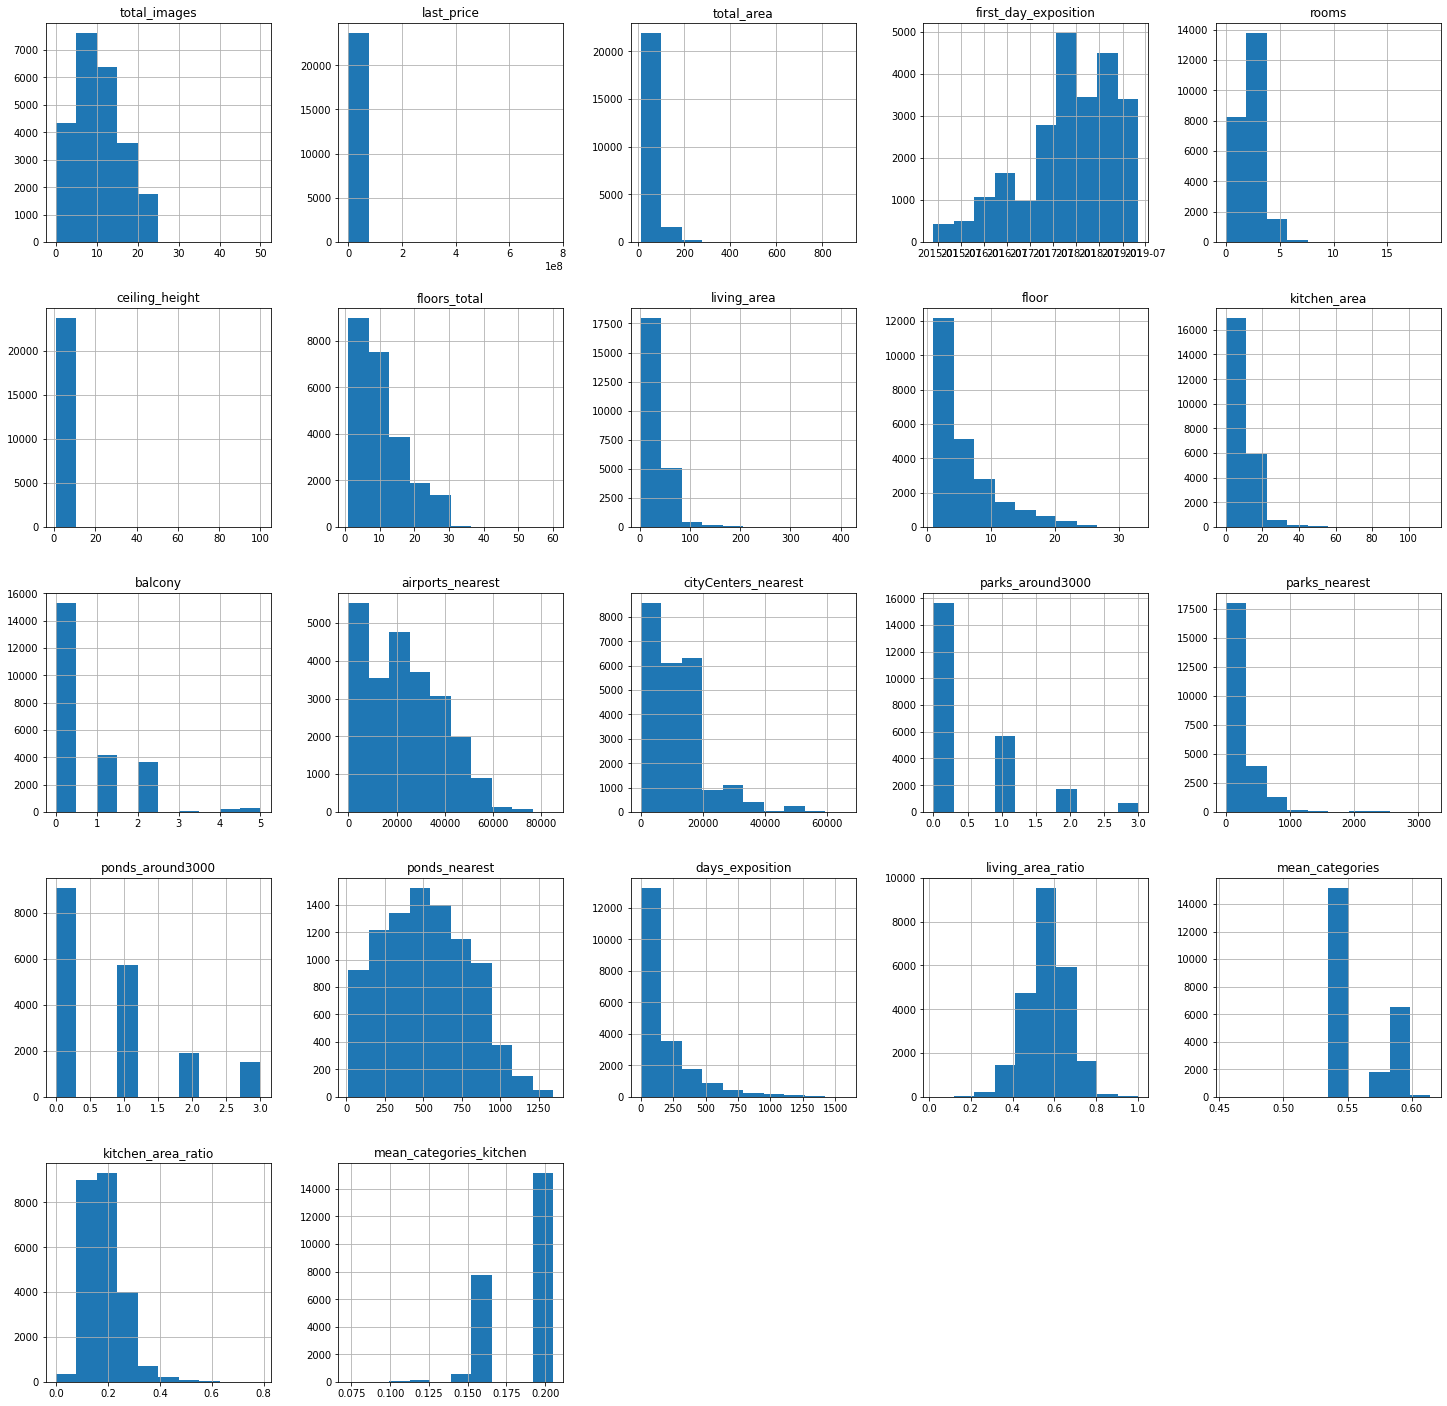

In [ ]:
data.hist(figsize = (25,25));

Из общей картины выбивается высота потолков, взглянем на значения выше 5 метров.

In [ ]:
data.loc[data['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,living_area_ratio,mean_categories,kitchen_area_ratio,mean_categories_kitchen
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,0.0,0.0,NaN,NaN,259.0,a,0.579710,0.550380,0.199275,0.204969
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,0.0,0.0,NaN,NaN,NaN,b,0.706667,0.593305,0.106667,0.159293
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,1.0,658.0,1.0,331.0,181.0,a,0.666667,0.550380,0.155556,0.204969
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,0.0,0.0,NaN,NaN,28.0,a,0.680000,0.550380,0.200000,0.204969
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,3.0,397.0,1.0,578.0,7.0,a,0.639344,0.550380,0.180328,0.204969
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,0.0,0.0,NaN,NaN,540.0,a,0.555556,0.550380,0.166667,0.204969
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,1.0,305.0,0.0,NaN,267.0,a,0.426000,0.550380,0.140000,0.204969
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,0.0,0.0,3.0,80.0,38.0,b,0.512500,0.593305,0.150000,0.159293
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,...,1.0,417.0,2.0,73.0,NaN,a,0.704955,0.550380,0.128378,0.204969
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,...,0.0,0.0,0.0,NaN,NaN,a,0.714286,0.550380,0.123810,0.204969


Данные мало похожи на опечатки, встречаются квартиры с потолками по 10 метров и более. Можно разделить значения больше 20 на 10 для начала.

In [ ]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height']/10
data.loc[data['ceiling_height'] > 10, ['locality_name', 'last_price', 'total_area', 'rooms', 'open_plan', 'ceiling_height']]

,locality_name,last_price,total_area,rooms,open_plan,ceiling_height
15061,Санкт-Петербург,5600000.0,56.4,2,False,14.0
22309,Санкт-Петербург,5300000.0,45.0,1,False,10.3


Обе квартиры находятся в Санкт-Петербурге, но не имеют никаких особенностей: цена, площадь, количество комнат близки к средним значениям. Вероятно высота потолков была опредлена некорректно, поэтому лучше их заменить средним значением по Санкт-Петербургу.

In [ ]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[(data['ceiling_height'] <= 3.5) & (data['ceiling_height'] >= 2.5), 'ceiling_height'].mean()
data.loc[data['ceiling_height'] > 10, ['locality_name', 'last_price', 'total_area', 'rooms', 'open_plan', 'ceiling_height']]

,locality_name,last_price,total_area,rooms,open_plan,ceiling_height


Кроме того,

Следующим странным результатом является аномально большое количество комнат, обычно в квартирах их не бывает более 5. Проверим остальные значения.

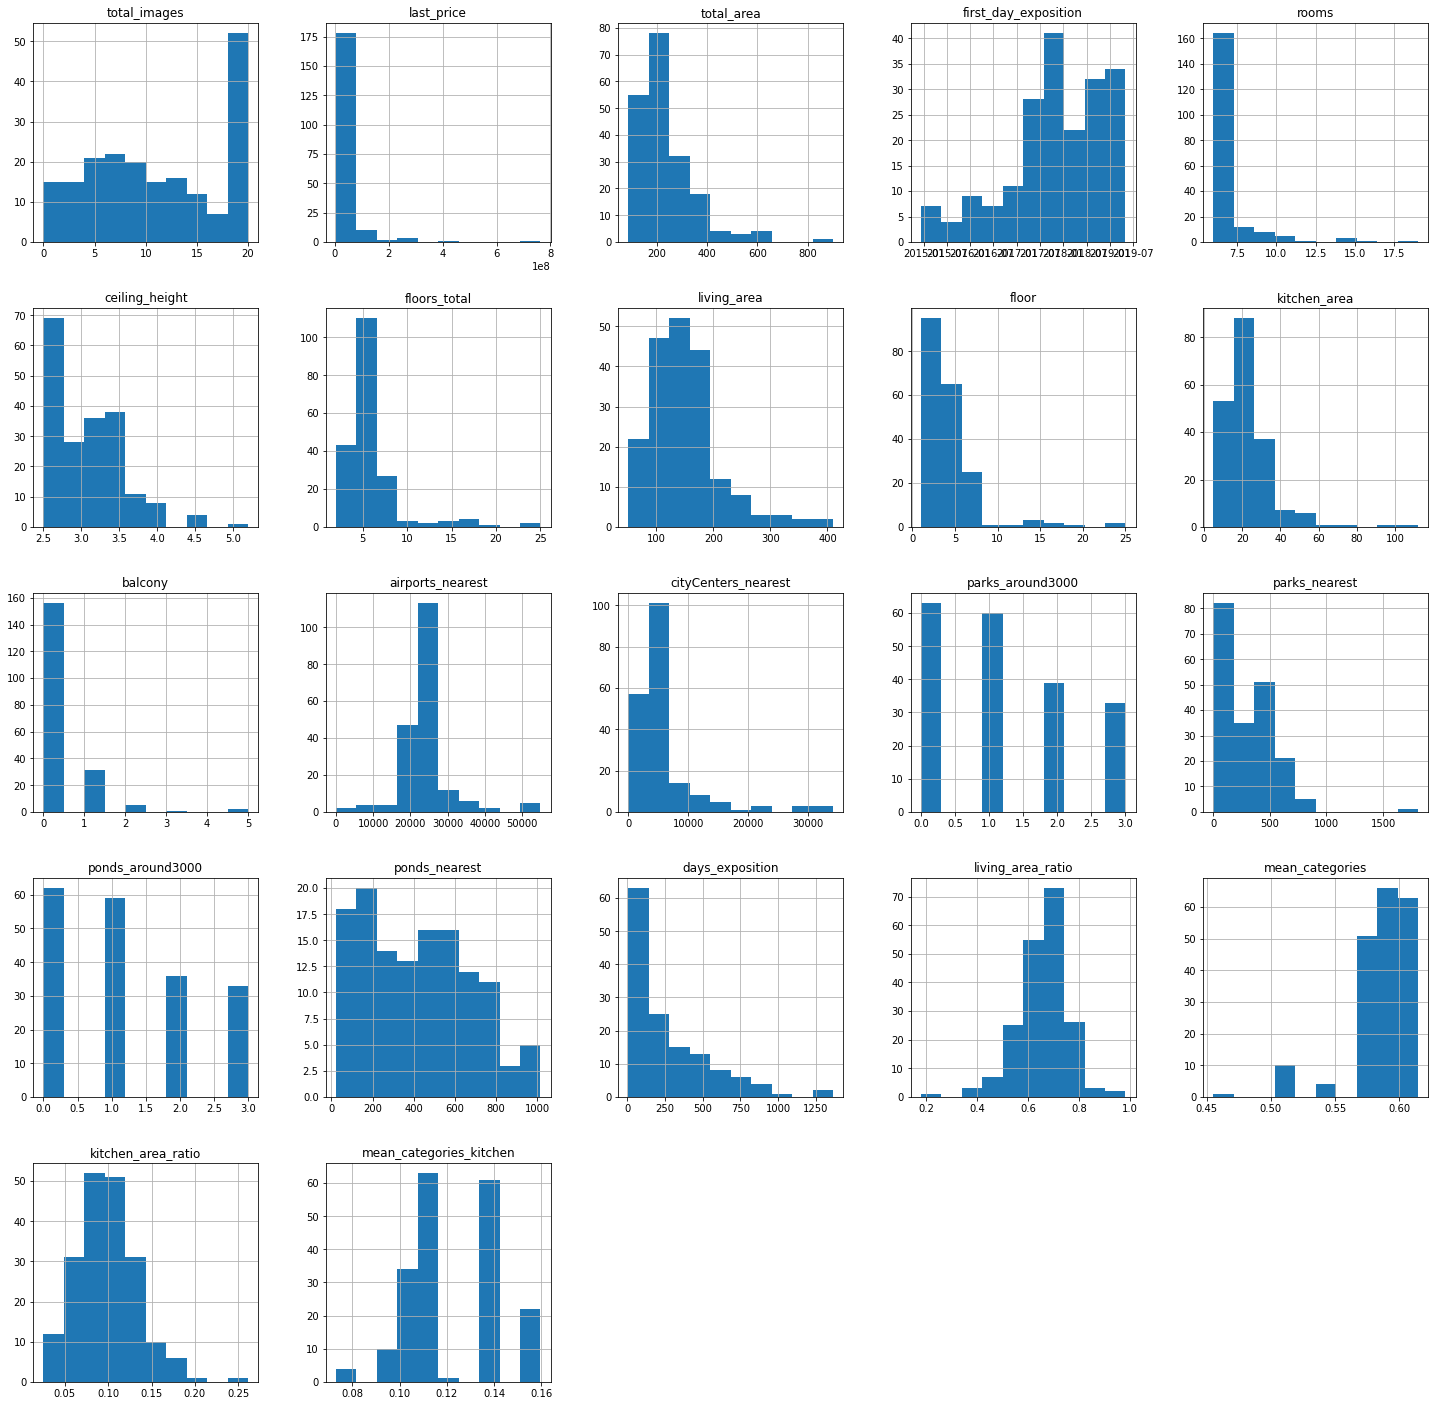

In [ ]:
data.loc[data['rooms'] > 5].hist(figsize=(25,25));

Исходя из того, что количество комнат соответствует общей площади, можно говорить о том, что в данных нет ошибок.

In [ ]:
data.loc[data['last_price'] == data['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,living_area_ratio,mean_categories,kitchen_area_ratio,mean_categories_kitchen
12971,19,763000000.0,400.0,2017-09-30,7,2.706238,10,250.0,10,False,...,1.0,530.0,3.0,756.0,33.0,g,0.625,0.515018,0.0925,0.09283


Противоречий в данных не обнаружено. Можно приступать к удалению редких значений. Начнем с цены на жилье. Так как в данных отсуттвует город Москва и некоторые другие города с привычно высокими ценами на жилье можно удалить значения у которых стоимость превышает 20 миллионов рублей.

In [ ]:
# check
data.shape[0]

23699

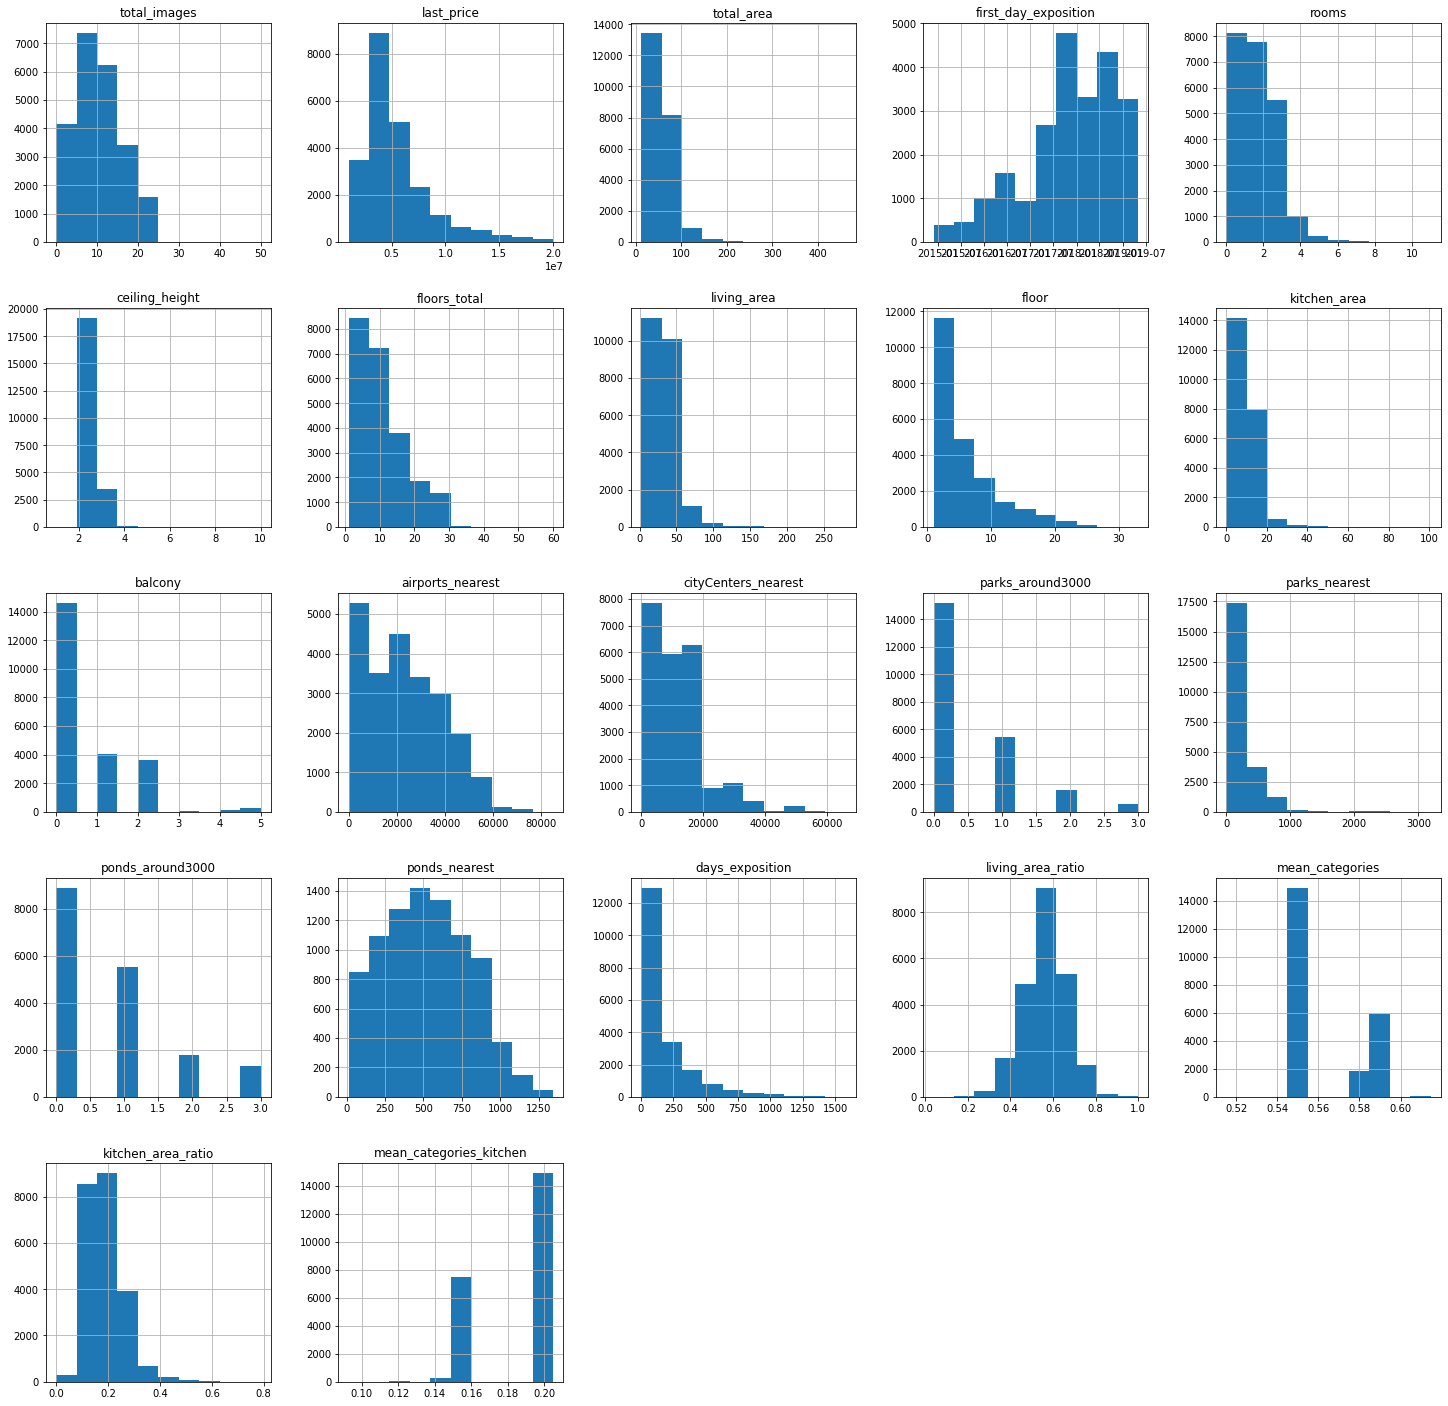

In [ ]:
data = data.loc[(data['last_price'] <= 20_000_000) & (data['last_price'] > 1000000)]
data.hist(figsize=(25,25));

In [ ]:
# check
data.shape[0]

22747

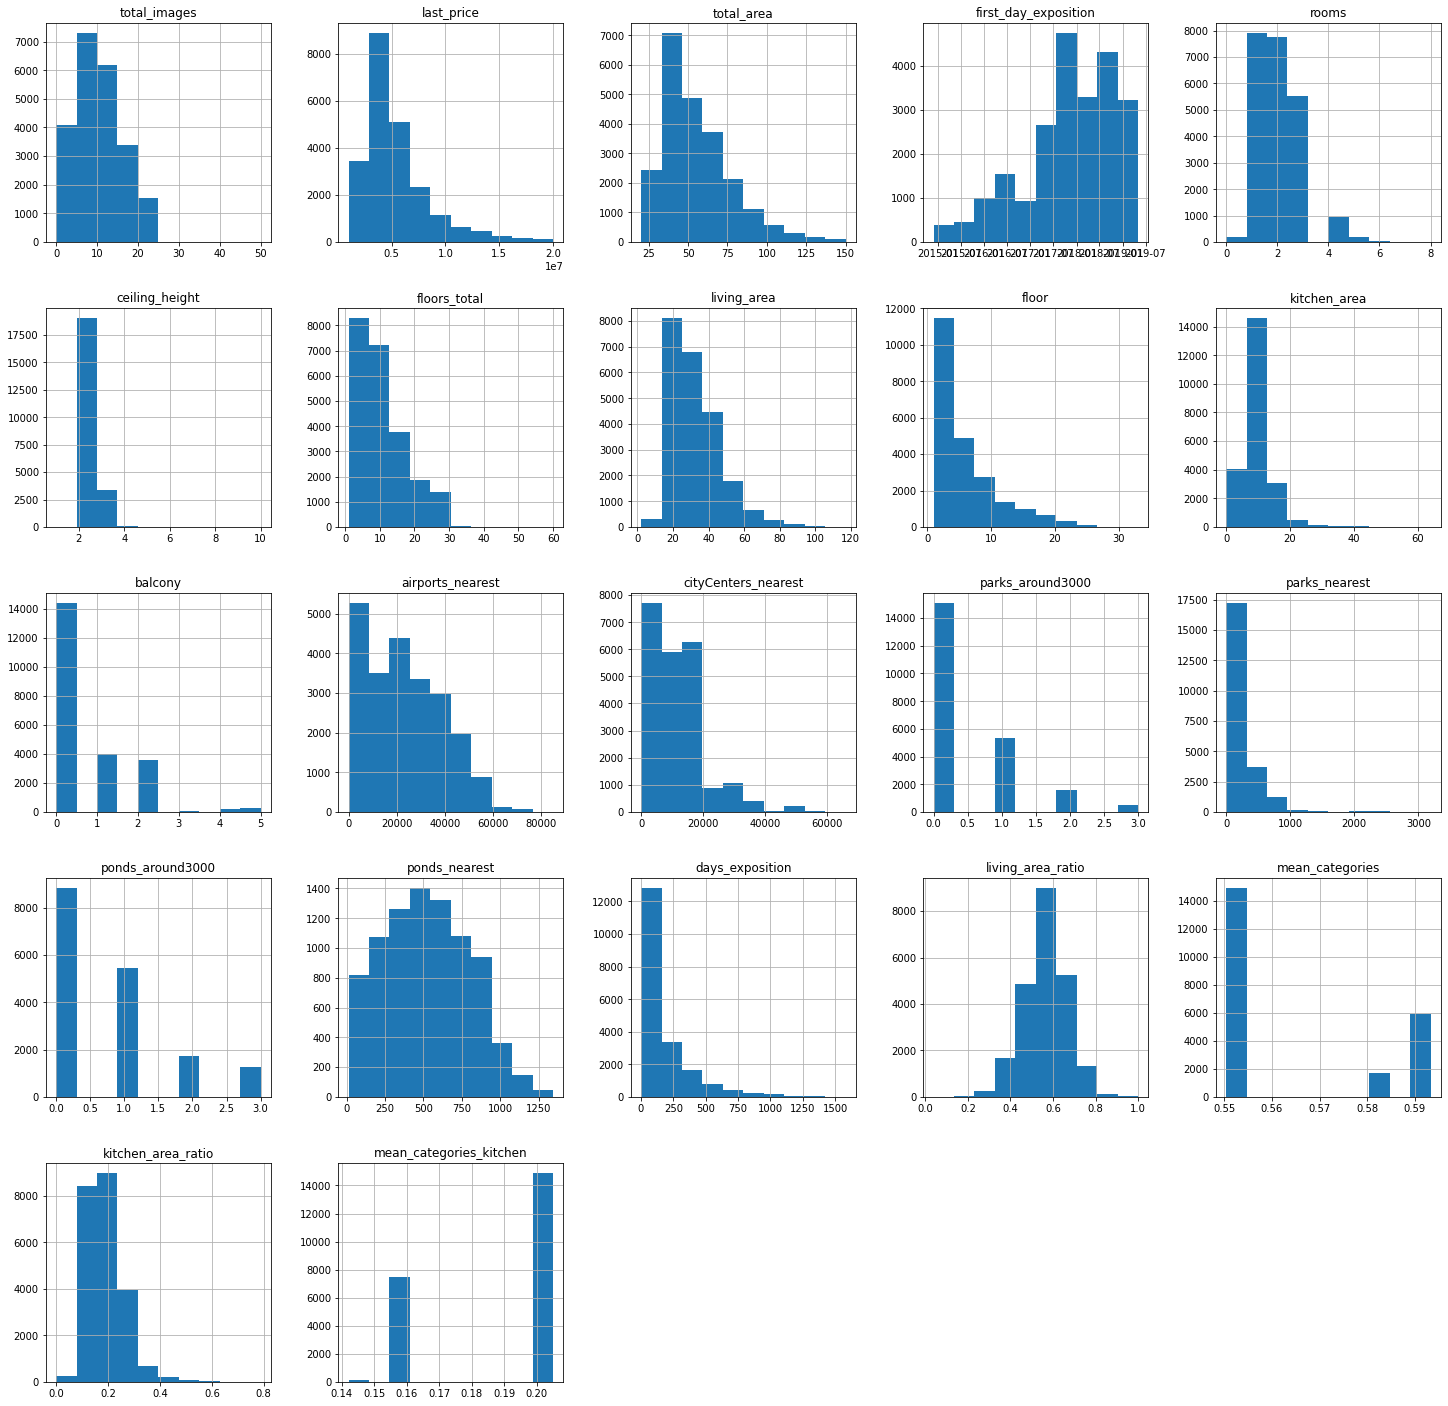

In [ ]:
data = data.loc[(data['total_area'] <= 150) & (data['total_area'] > 20)]
data.hist(figsize=(25,25));

In [ ]:
# check
data.shape[0]

22523

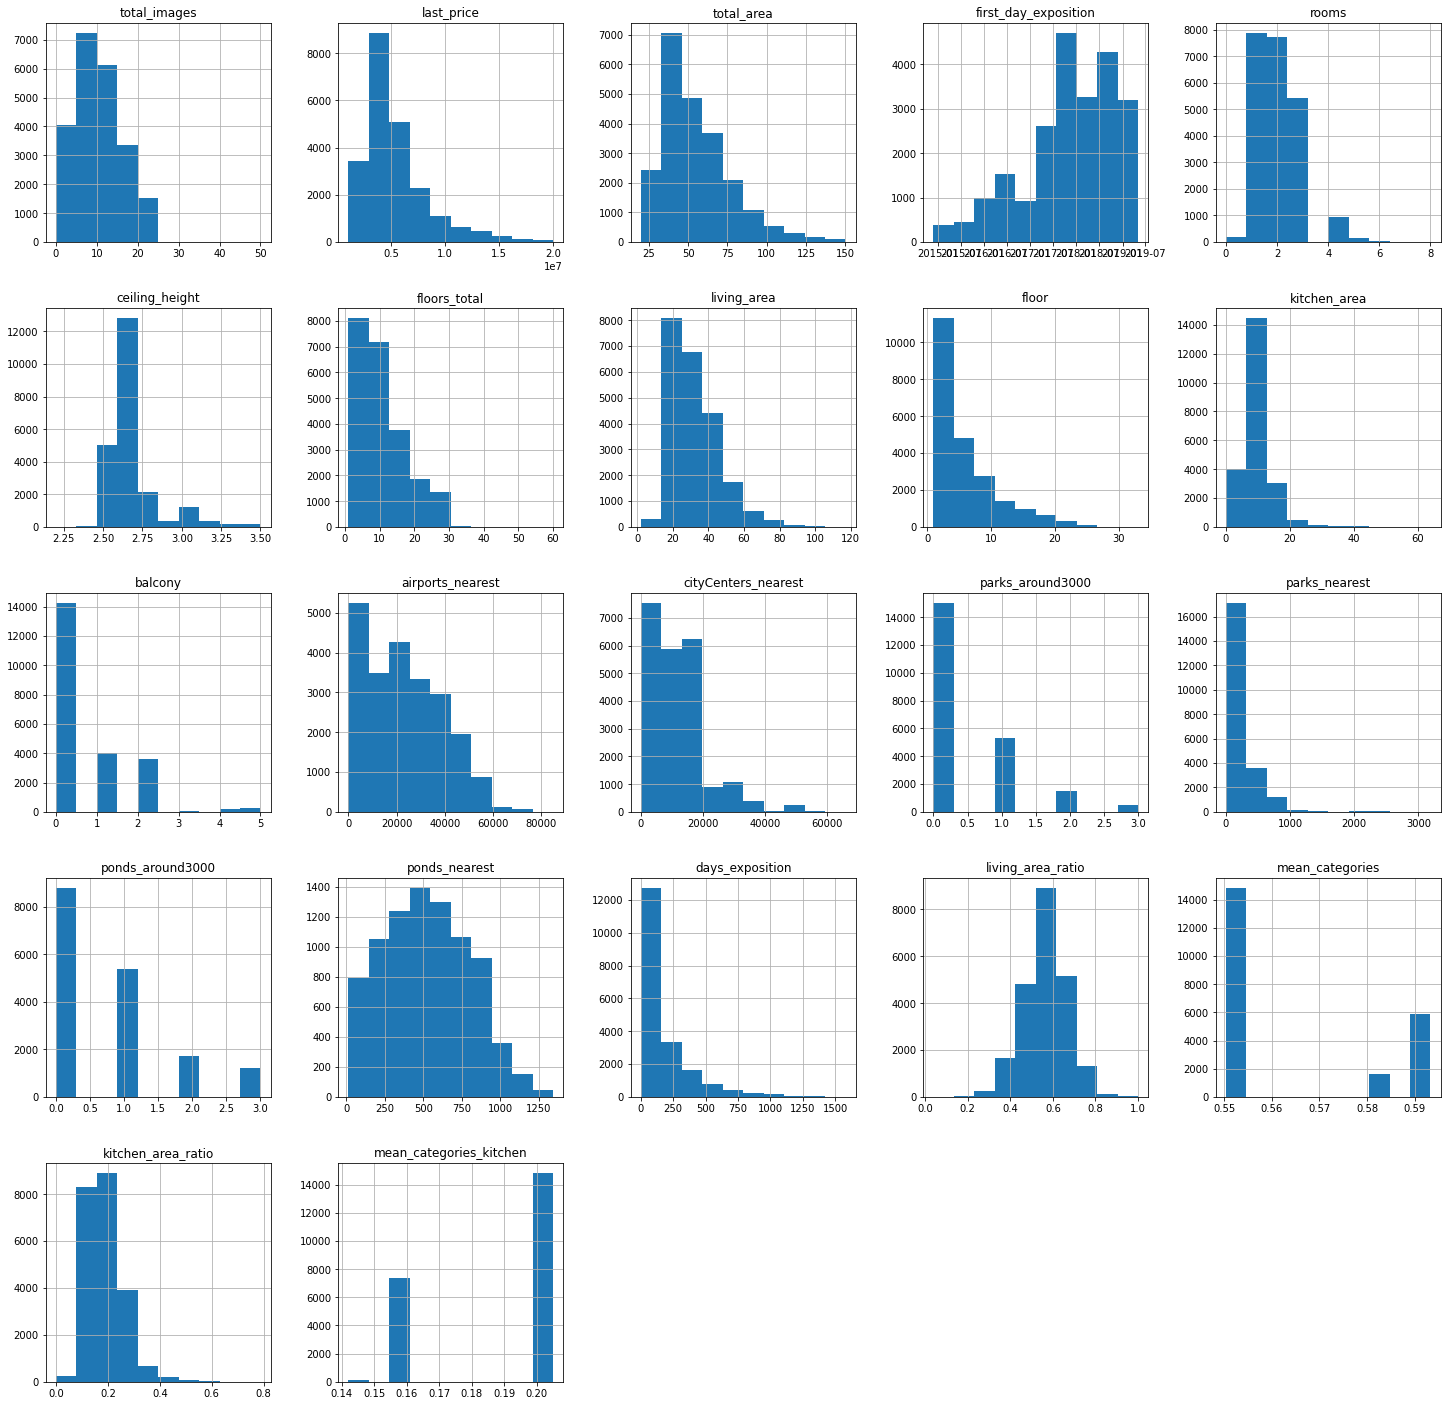

In [ ]:
data = data.loc[(data['ceiling_height'] <= 3.5) & (data['ceiling_height'] > 2)]
data.hist(figsize=(25,25));

In [ ]:
# check
data.shape[0]

22318

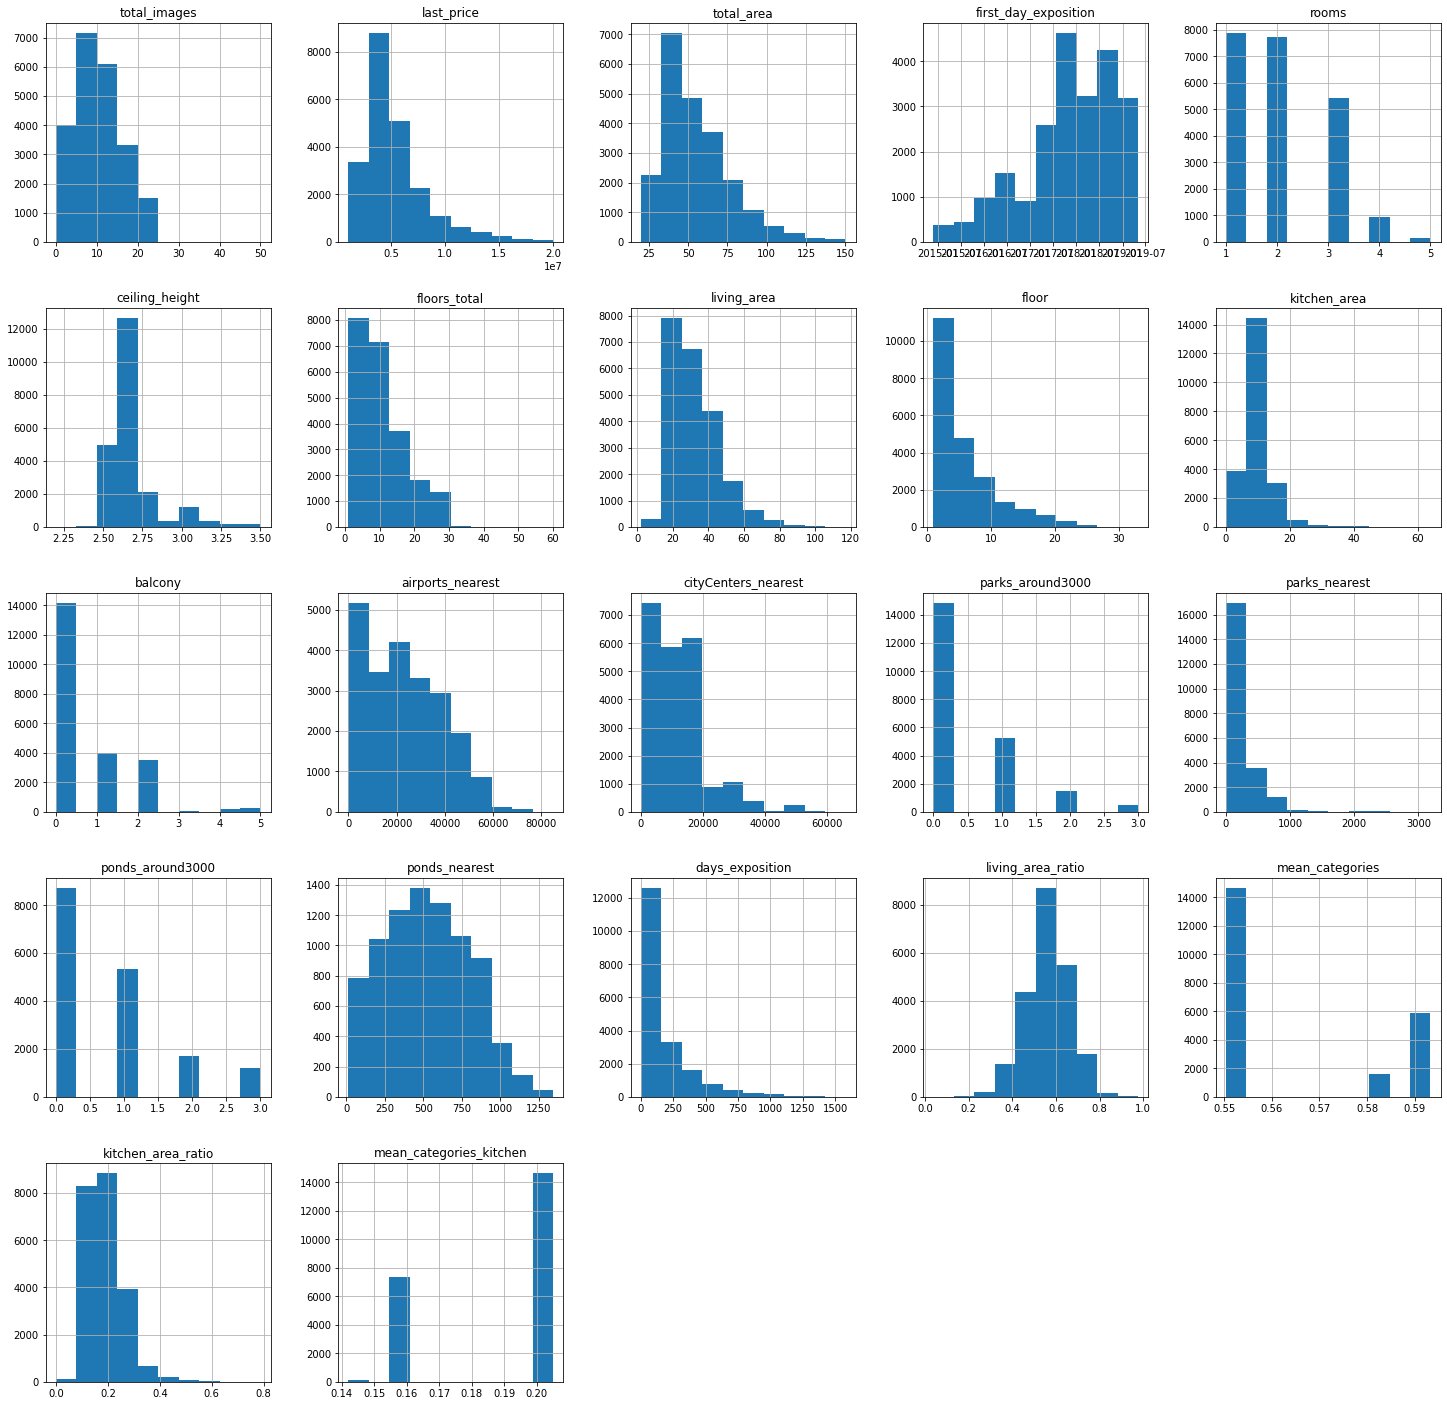

In [ ]:
data = data.loc[(data['rooms'] <= 5) & (data['rooms'] > 0)]
data.hist(figsize=(25,25));

#### check de

In [ ]:
# check
data.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22105 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             22105 non-null  int64         
 1   last_price               22105 non-null  float64       
 2   total_area               22105 non-null  float64       
 3   first_day_exposition     22105 non-null  datetime64[ns]
 4   rooms                    22105 non-null  int64         
 5   ceiling_height           22105 non-null  float64       
 6   floors_total             22105 non-null  int64         
 7   living_area              22105 non-null  float64       
 8   floor                    22105 non-null  int64         
 9   is_apartment             22105 non-null  bool          
 10  studio                   22105 non-null  bool          
 11  open_plan                22105 non-null  bool          
 12  kitchen_area             22105 n

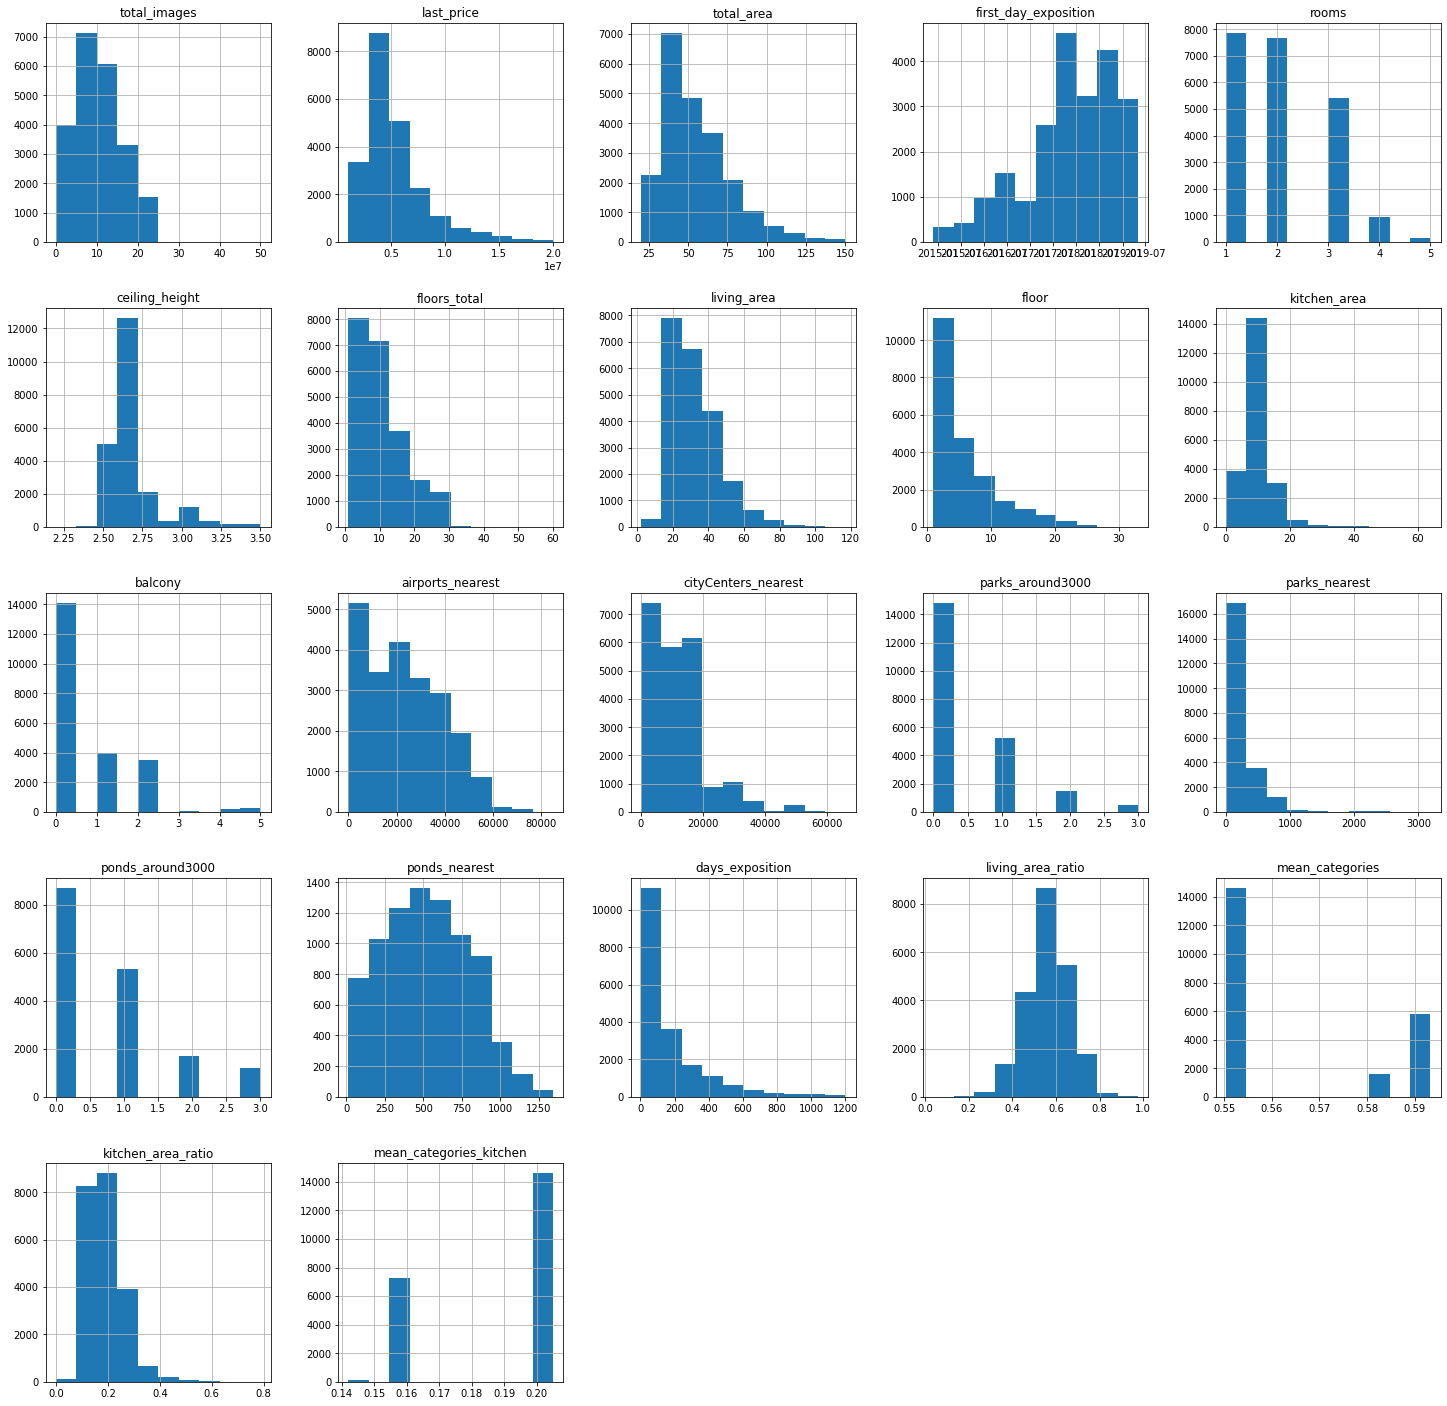

In [ ]:
data = data.loc[(data['days_exposition'] <= 1200) & (data['days_exposition'] > 2) | (data['days_exposition'].isna() == True)]
data.hist(figsize=(25,25));

In [ ]:
# check
data.shape[0]

22025

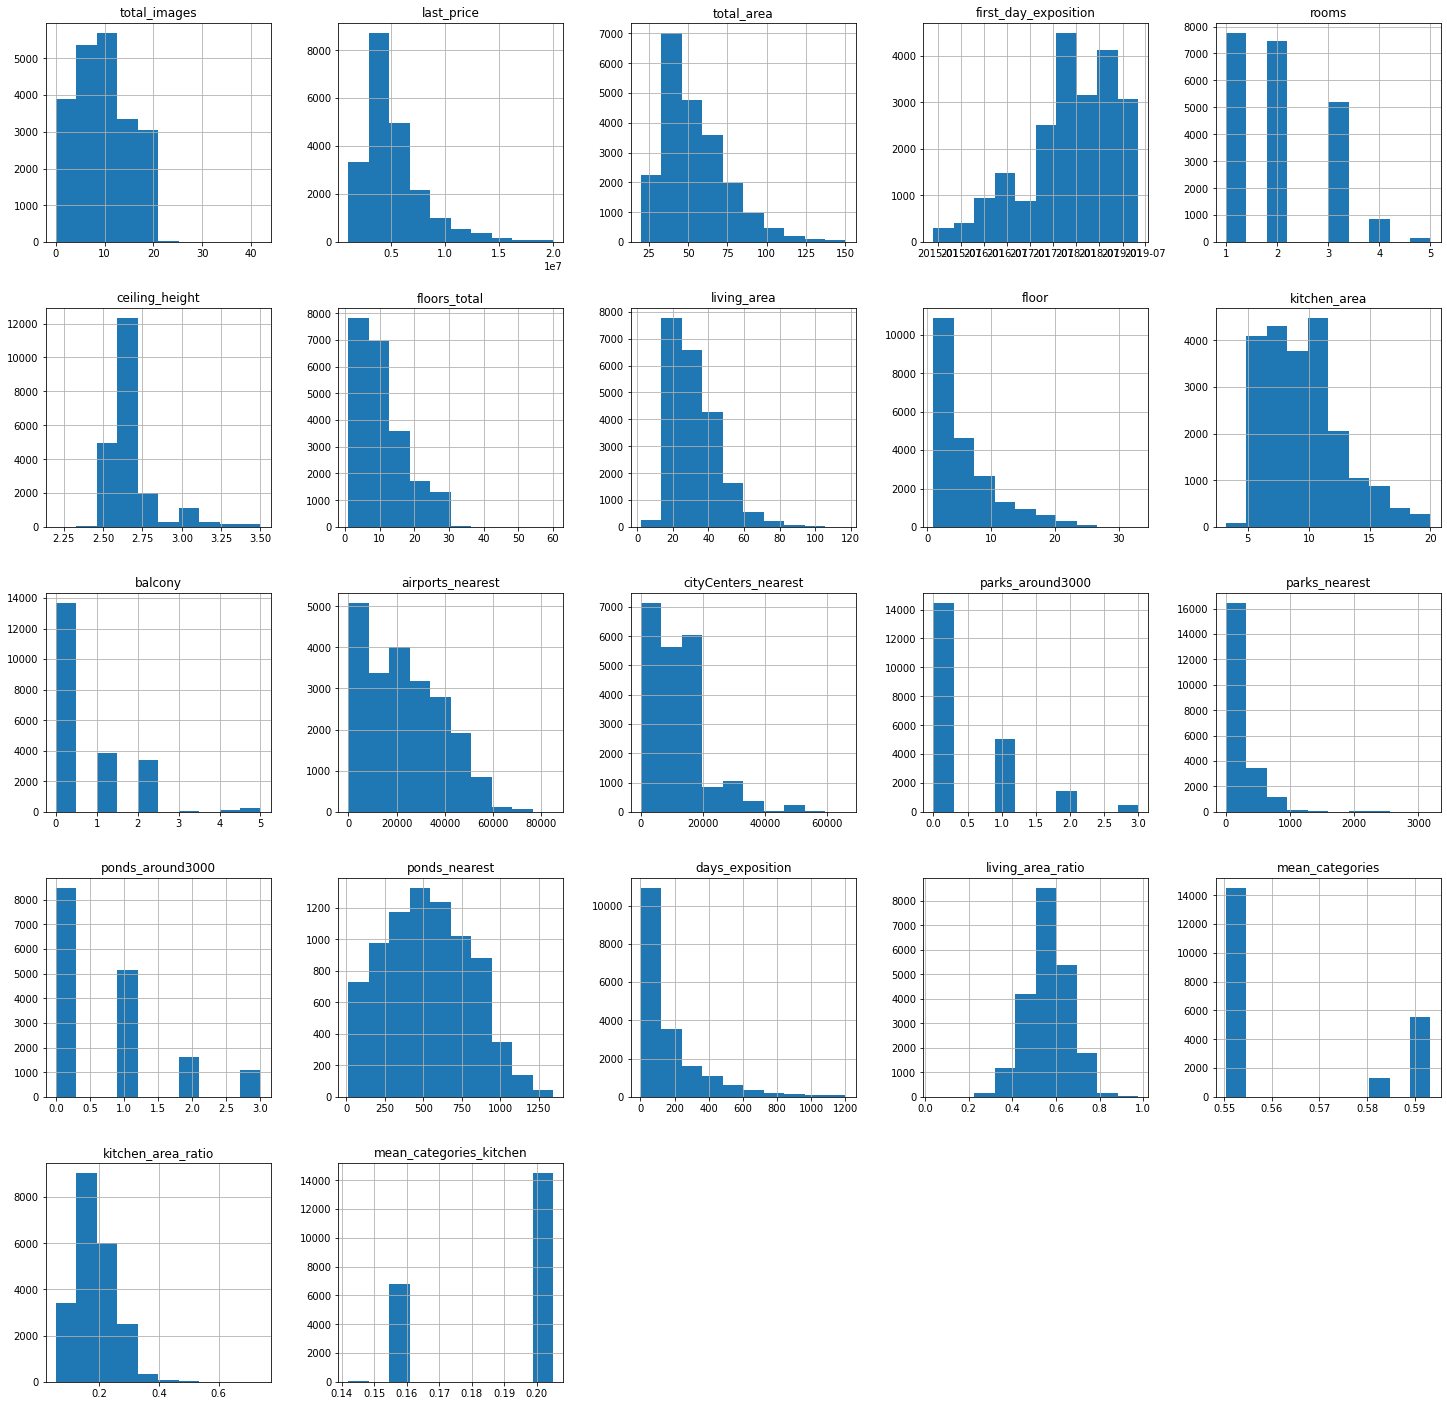

In [ ]:
data = data.loc[(data['kitchen_area'] <= 20) & (data['kitchen_area'] > 3)]
data.hist(figsize=(25,25));

In [ ]:
# check
data.shape[0]

21391

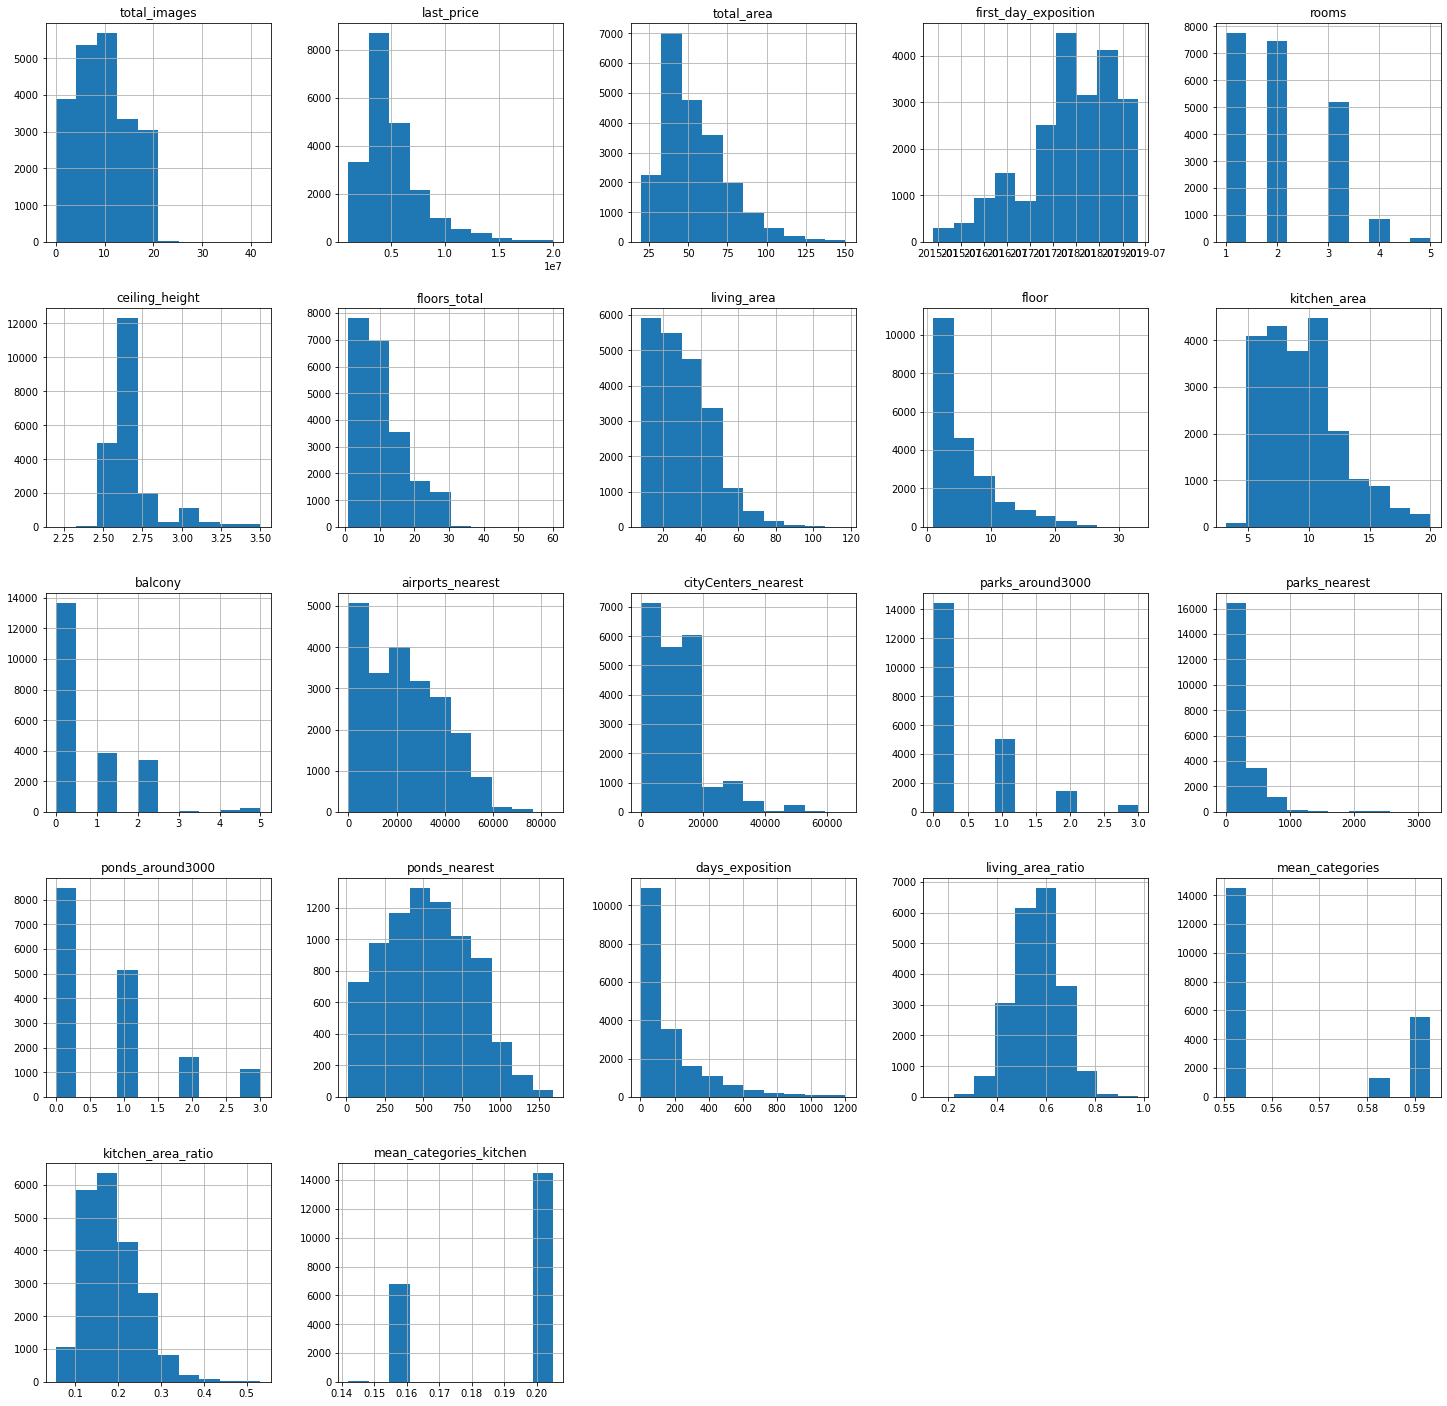

In [ ]:
data = data.loc[data['living_area'] >= 8]
data.hist(figsize=(25,25));

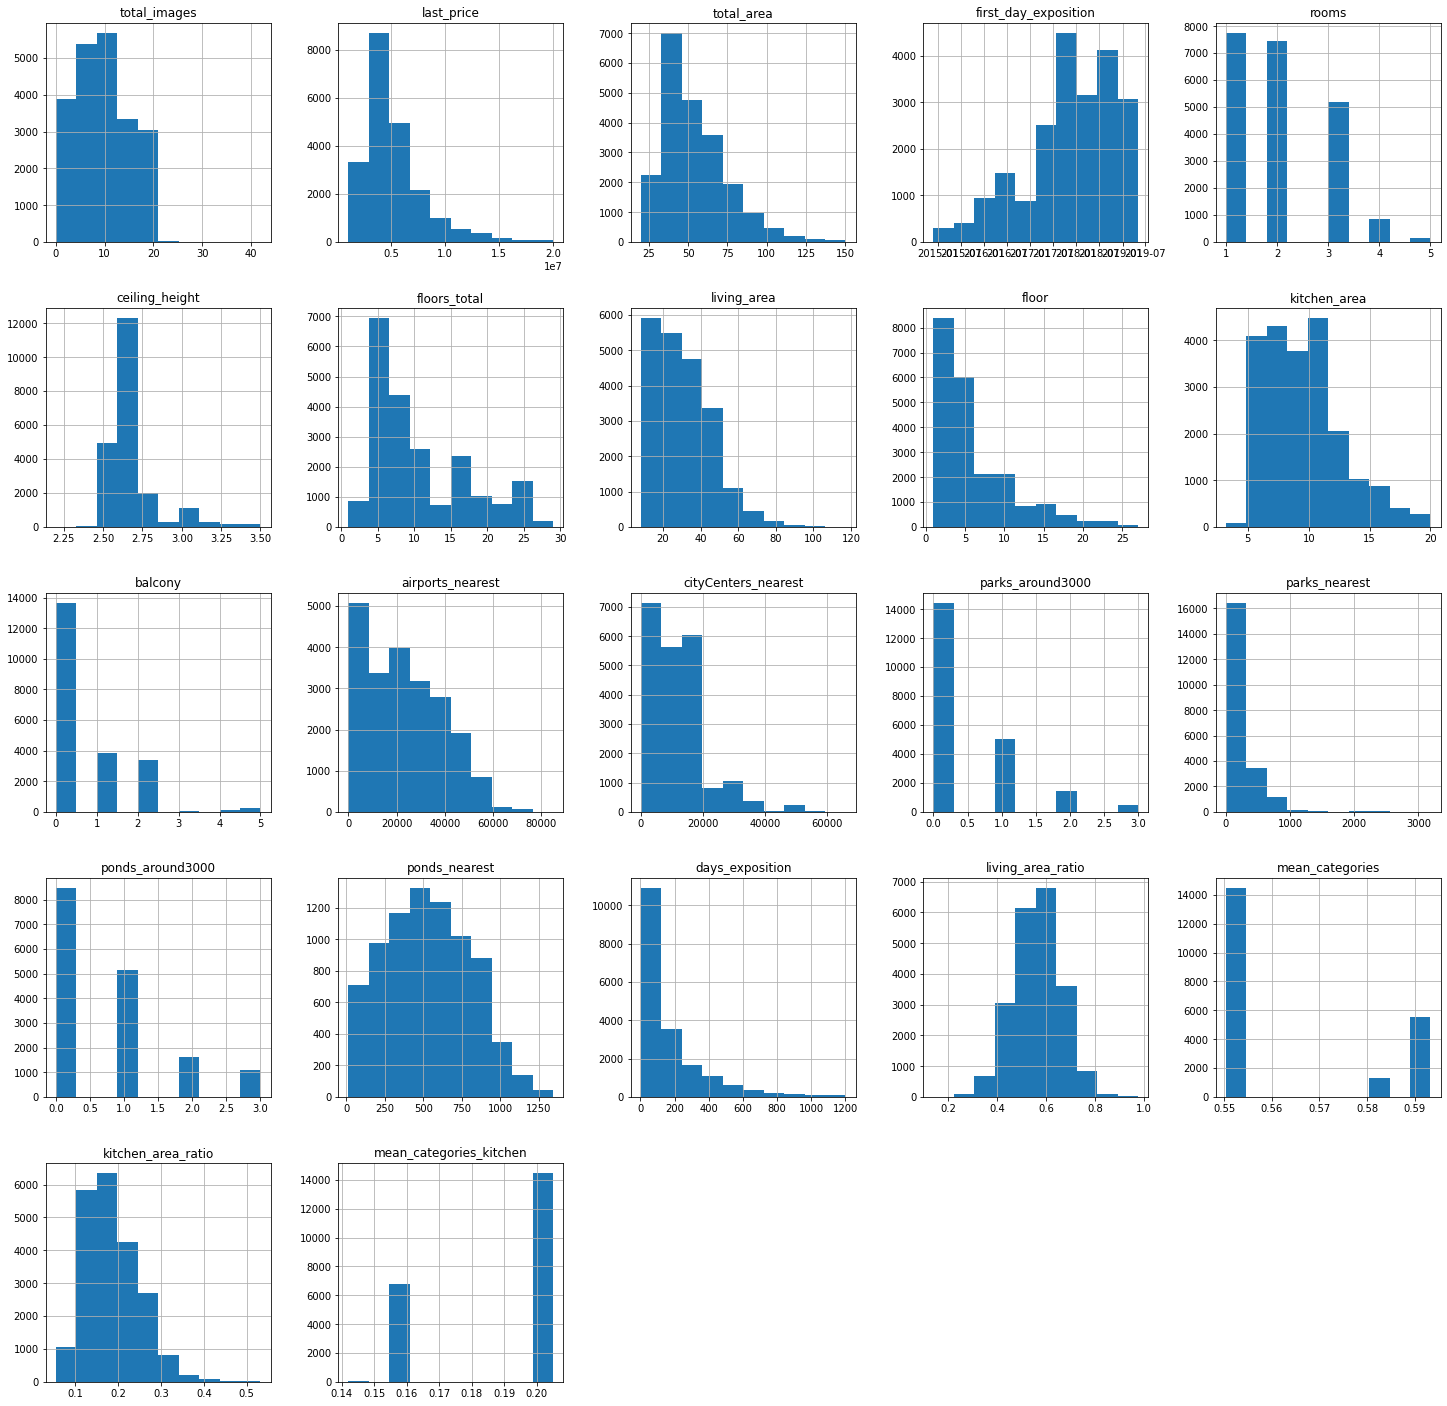

In [ ]:
data = data.loc[data['floors_total'] <= 30]
data.hist(figsize=(25,25));

В оставшихся данных обнуружены следующие особенности:
Количество фотографий - многие пользователи оставляют от 5 до 15 фотографий жилья. Данное количество является оптимальным для среднестатистического жилья, если будет меньше, то объявление не привлечет внимания, а делать более 25 фотографий не имеет смысла, ведь потенциальный покупатель все равно приедет ее смотреть.
Цена - болшая часть квартир стоит от 2,5 до 10 миллионов рублей.
Площадь квартиры - на сайте представлены в основном небольшие квартиры от 25 до 75 квадратных метров.
Интересная особенность у площади кухни. Несмотря на то, что в данных представлены разные квартиры, площадь кухни практически у всех одинаковая с небольшими отклонениями. Объясняется это тем, что покупатели стремятся получить большие комнаты за счет относительно небольшой цены, поэтому застройщики не рискуют делать кухни более 20 квадратных метров.
Остальные графики не особо интересны, так как они вполне естественны для имеющихся данных.

#### check gap

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21360 entries, 1 to 23698
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             21360 non-null  int64         
 1   last_price               21360 non-null  float64       
 2   total_area               21360 non-null  float64       
 3   first_day_exposition     21360 non-null  datetime64[ns]
 4   rooms                    21360 non-null  int64         
 5   ceiling_height           21360 non-null  float64       
 6   floors_total             21360 non-null  int64         
 7   living_area              21360 non-null  float64       
 8   floor                    21360 non-null  int64         
 9   is_apartment             21360 non-null  bool          
 10  studio                   21360 non-null  bool          
 11  open_plan                21360 non-null  bool          
 12  kitchen_area             21360 n

In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,360.00","21,360.00","21,360.00","18,682.00","21,360.00","21,360.00","21,360.00","21,360.00","21,360.00"
min,1.00,20.10,2.20,3.00,"1,010,000.00",8.30,3.20,1.00,1.00
max,5.00,150.00,3.50,"1,200.00","20,000,000.00",117.10,20.00,27.00,29.00


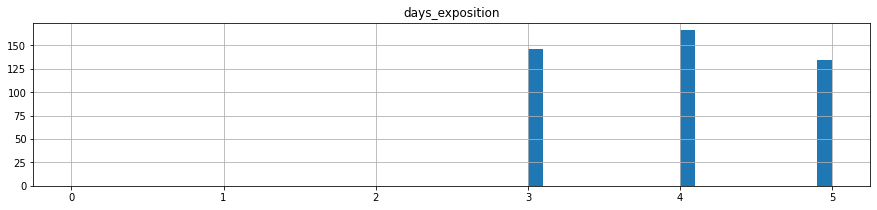

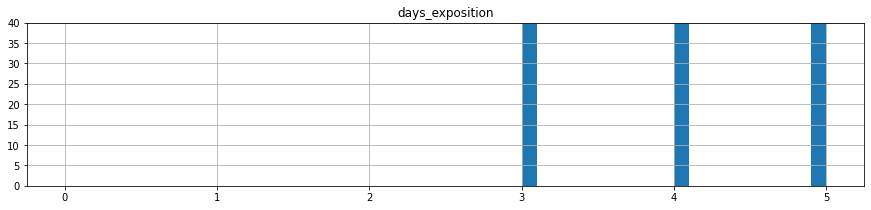

In [ ]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [ ]:
# check
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [ ]:
# check
df_check .rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


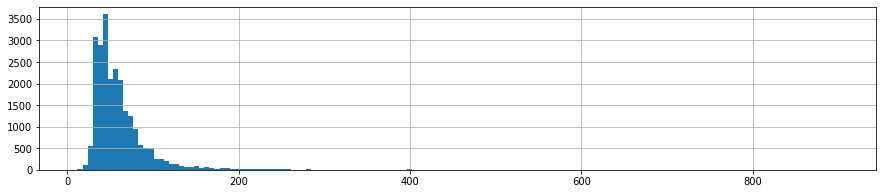

In [ ]:
# check
df_check .total_area.hist(bins = 150, figsize = (15,3));

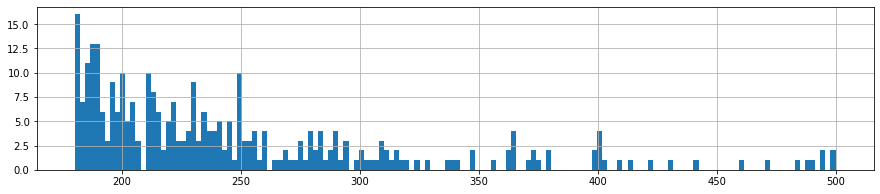

In [ ]:
# check
df_check .total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

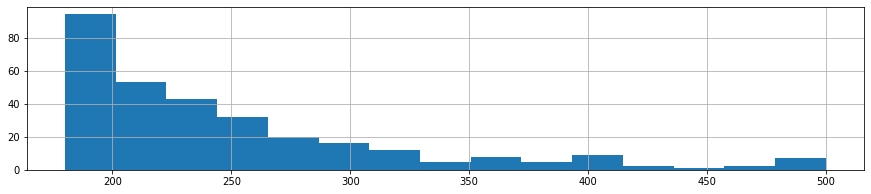

In [ ]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

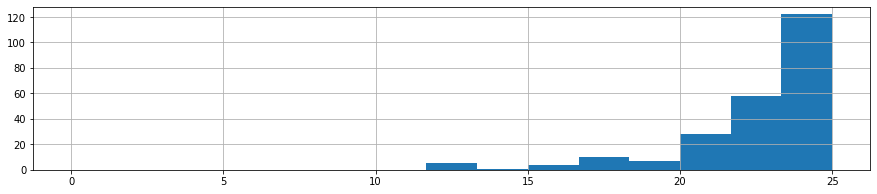

In [ ]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [ ]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,22.00,2.40,3.00,"1,070,000.00",10.00,4.00,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,300,000.00",13.18,5.00,1.00,2.00
0.5,2.00,50.10,2.71,92.00,"4,500,000.00",29.70,9.00,4.00,9.00
0.99,4.00,120.54,3.30,972.38,"15,508,200.00",76.40,19.00,23.00,26.00
0.9988,5.00,145.00,3.50,"1,161.00","19,281,506.21",96.56,20.00,26.00,27.00


In [ ]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    df_check[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.30,3.00,"562,188.00",10.00,3.77,1.00,2.00
0.01,1.00,25.20,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.99,5.00,197.21,3.83,"1,068.66","36,000,000.00",120.00,35.09,23.00,26.00
0.9988,8.00,380.00,25.00,"1,369.90","124,772,448.00",219.69,60.00,26.00,35.00


### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
data['price_per_meter'] = data['last_price']/data['total_area']
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [ ]:
def floor_type(floor):
    if floor['floor'] == 1:
        return 'Первый'
    elif floor['floor'] == floor['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
data['floor_type'] = data.apply(floor_type, axis = 1)
data.loc[:, ['floor_type', 'floor', 'floors_total']]

,floor_type,floor,floors_total
1,Первый,1,11
2,Другой,4,5
5,Другой,5,12
6,Другой,6,26
7,Другой,22,24
...,...,...,...
23692,Другой,4,5
23693,Другой,8,9
23695,Другой,4,5
23696,Первый,1,3


In [ ]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']//1000

### Проведите исследовательский анализ данных

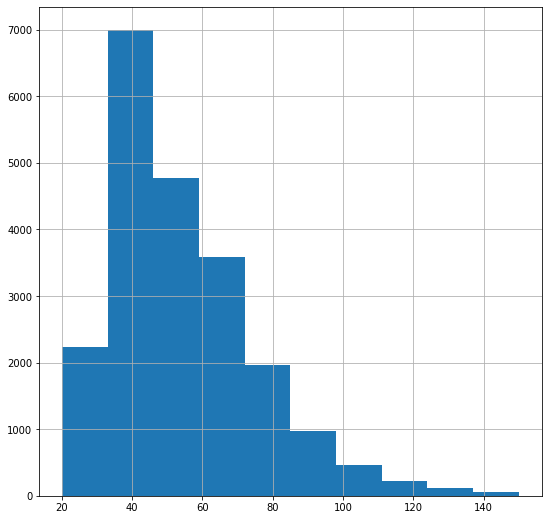

In [ ]:
data['total_area'].hist(bins = 10, figsize = (9, 9));

Большая часть квартир площадью от 30 до 80 квадратных метров. Встречаются квартиры и по 20 метров, но они составляют меньшинство.

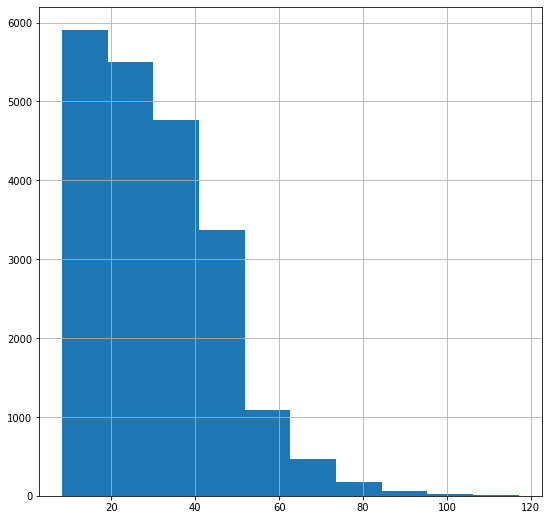

In [ ]:
data['living_area'].hist(bins = 10, figsize = (9, 9));

Жилая площадь составляет от 20 до 50 квадратных метров.

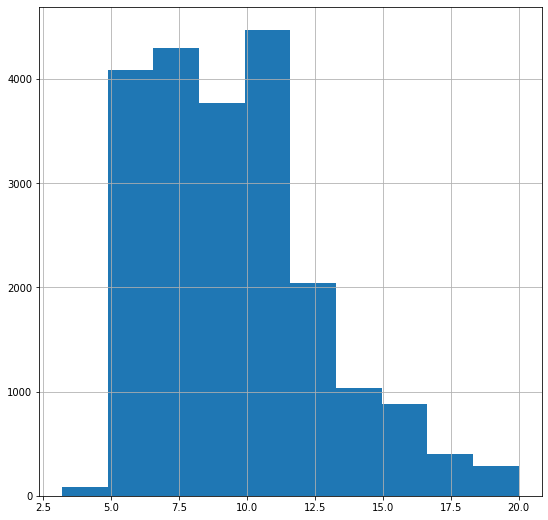

In [ ]:
data['kitchen_area'].hist(bins = 10, figsize = (9, 9));

Площадь кухни не превышает 20 квадратных метров во всех типах жилья. В студиях кухни объединены с комнатами, поэтому их площадь равляется нулю.

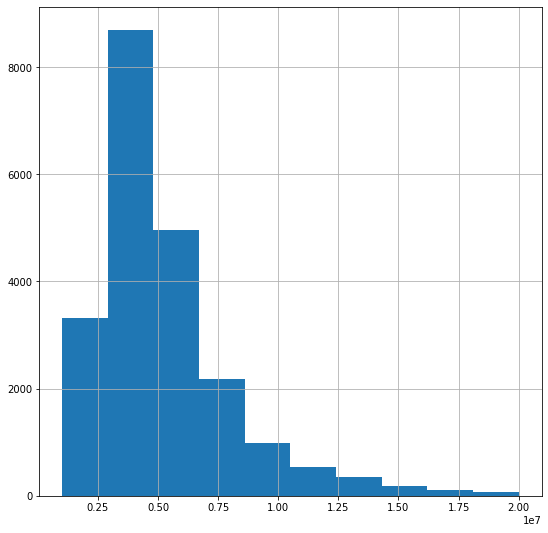

In [ ]:
data['last_price'].hist(bins = 10, figsize = (9, 9));

Средняя стоимость квартир варьируется от 2,5 миллионов рублей до 7,5 миллионов.

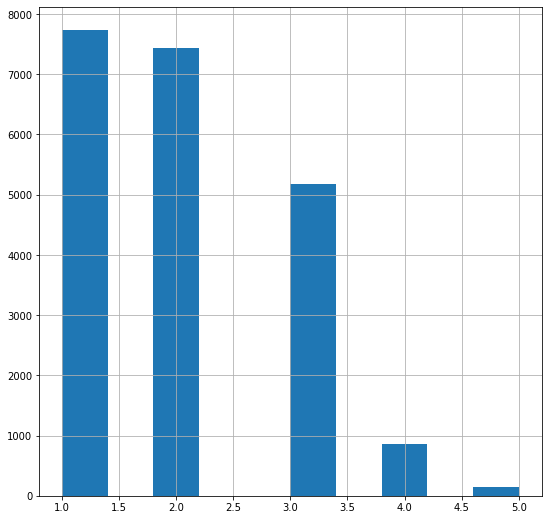

In [ ]:
data['rooms'].hist(bins = 10, figsize = (9, 9));

Большинство квартир в объявлениях однокомнатные и двухкомнатные. Наименее распространены квартиры с 4 и более комнатами.

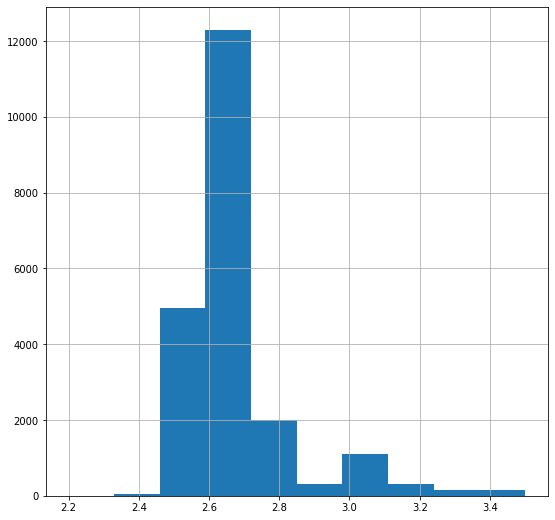

In [ ]:
data['ceiling_height'].hist(bins = 10, figsize = (9, 9));

Высота потолков установлена нами в рамках заполнения пропусков, поэтому большая часть данных оказалась в районе 2,7 метров.

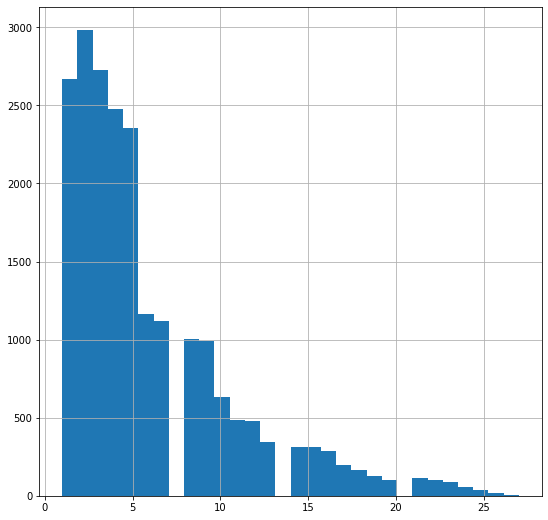

In [ ]:
data['floor'].hist(bins = 30, figsize = (9, 9));

Большая часть квартир находится на 1 или 2 этажах. Вероятно это связано с тем, что в данных много низкоэтажных домов.

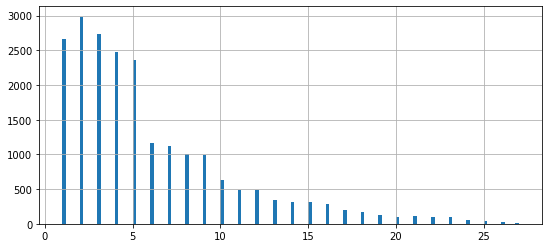

In [ ]:
# check
data['floor'].hist(bins = 130, figsize = (9, 4));

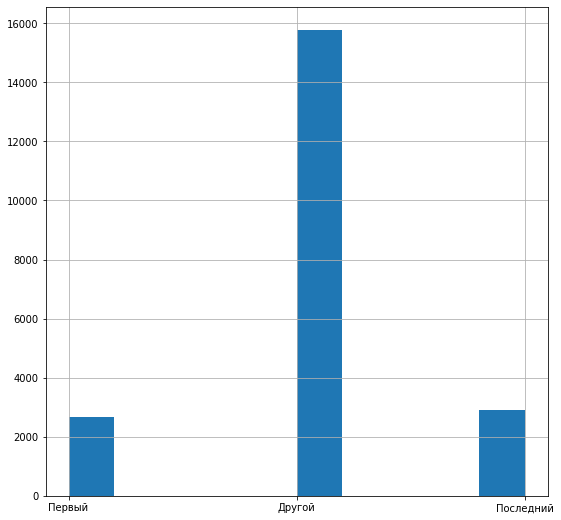

In [ ]:
data['floor_type'].hist(bins = 10, figsize = (9, 9));

Большая часть квартир не расположена ни на первом, ни на последнем этажах.

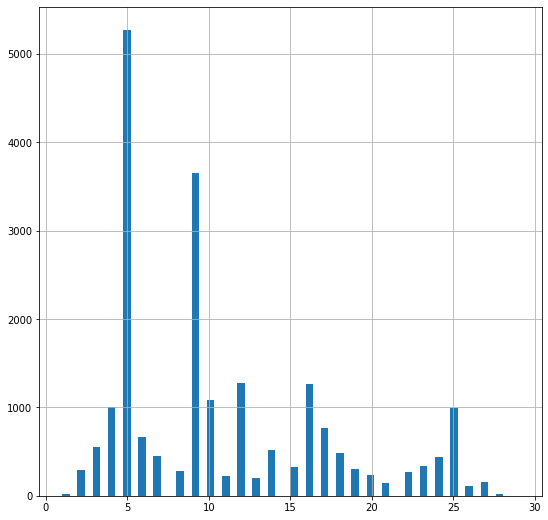

In [ ]:
data['floors_total'].hist(bins = 60, figsize = (9, 9));

Большая часть зданий ниже либо пятиэтажные либо десятиэтажные.

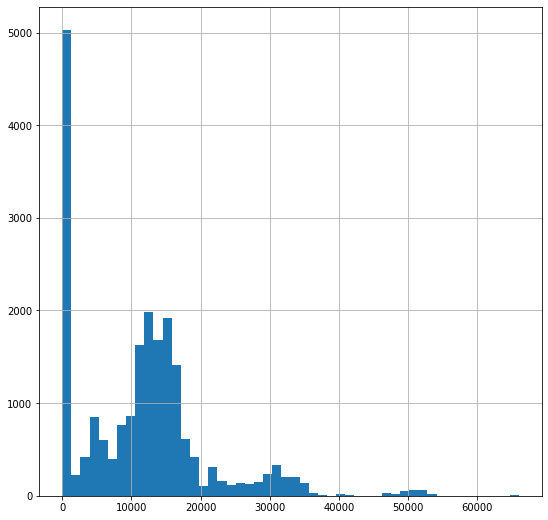

In [ ]:
data['cityCenters_nearest'].hist(bins = 50, figsize = (9, 9));

Большая часть квартир расположена не в городах, поэтому не имеет центра города. Значения равны нулю. Те квартиры, которые находятся в городе находятся на расстоянии не более 20 километров от центра города, что и является практически всем городом.

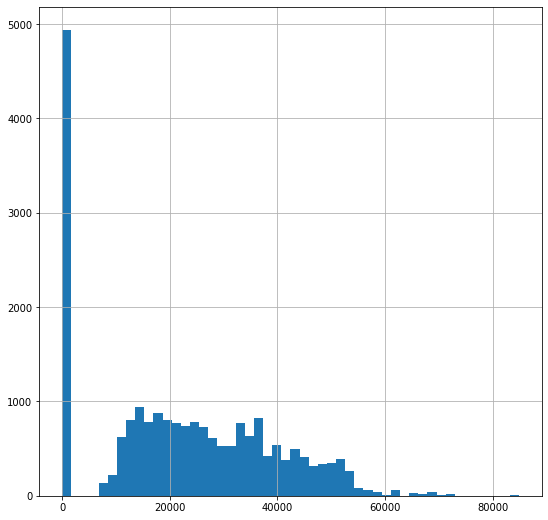

In [ ]:
data['airports_nearest'].hist(bins = 50, figsize = (9, 9));

Расстояние до аэропорта аналогично расстоянию до центра. В некоторых городах от отсутствует, значение 0. В других нужно пересечь практически весь город, чтобы до него добраться.

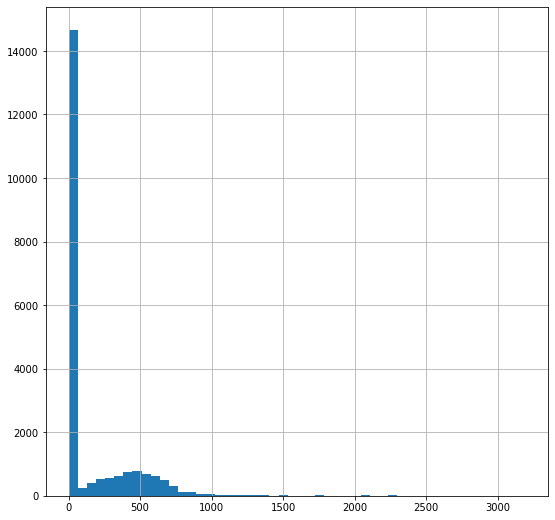

In [ ]:
data['parks_nearest'].hist(bins = 50, figsize = (9, 9));

Большая часть домов не имеет в окрестностях парков.

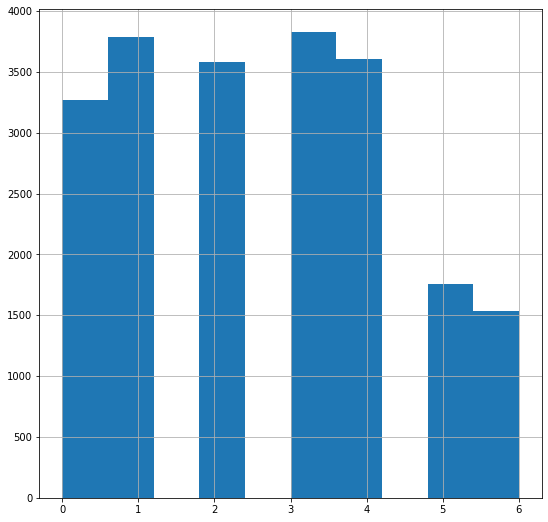

In [ ]:
data['weekday'].hist(bins = 10, figsize = (9, 9));

Наиболее активно объявления выставляются в будние дни, что не характерно для обычных людей. Вероятно этим занимаются агентства. А в выходные настает время тех, кто всю неделю работал.

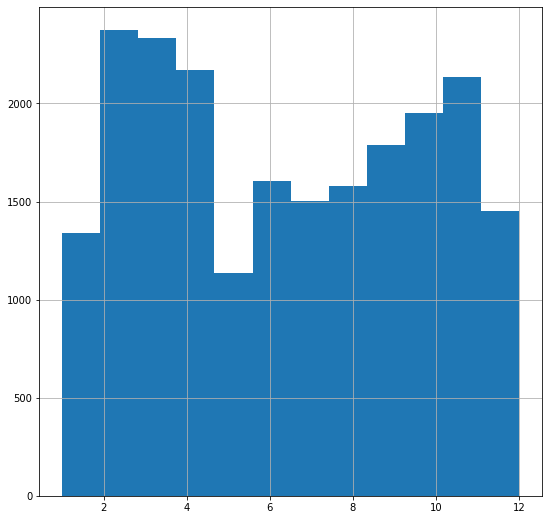

In [ ]:
data['month'].hist(bins = 12, figsize = (9, 9));

Наиболее активно квартиры продают с февраля по апрель.Это может быть также связано с деятельностью агентств. Ведь они работают практически круглый год, и долго отдыхают в новогодние праздники и на майские. Летом размещений меньше, чем зимой так как и клиенты и работники отправляются в отпуск.

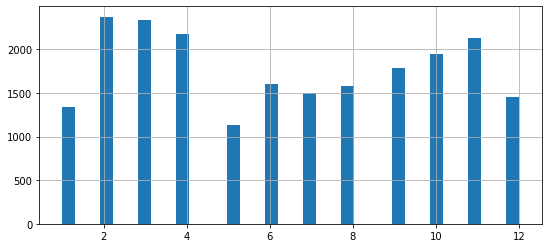

In [ ]:
# check
data['month'].hist(bins = 36, figsize = (9, 4));

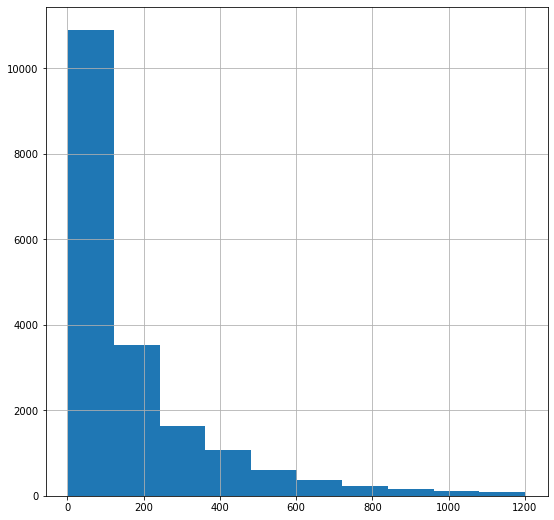

In [ ]:
data['days_exposition'].hist(bins = 10, figsize = (9, 9));

In [ ]:
display(data['days_exposition'].median(), data['days_exposition'].mean())

92.0

171.6917888876994

Обычно квартиры продаются за 3 месяца. Из-за того, что некоторые объявления висят на сайте годами среднее значение сместилось к половине года. Квартиры, которые висят на сайте более 180 дней можно считать необычно долгими продажами. Те же, что продаются менее, чем за 3 месяца - необычно быстрыми.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

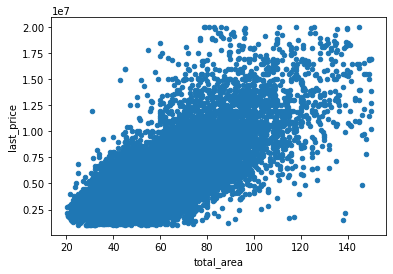

In [ ]:
#pd.plotting.scatter_matrix(data.loc[:, ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'floor', 'first_day_exposition']], figsize = (20,20));
data.plot(x='total_area', y='last_price', kind='scatter')

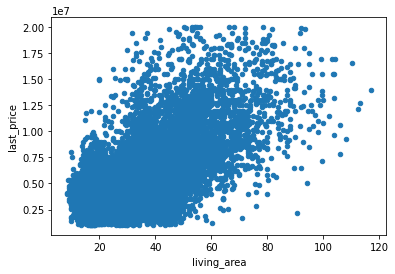

In [ ]:
data.plot(x='living_area', y='last_price', kind='scatter');

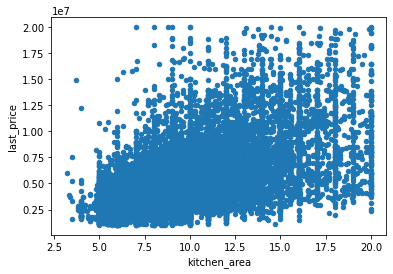

In [ ]:
data.plot(x='kitchen_area', y='last_price', kind='scatter');

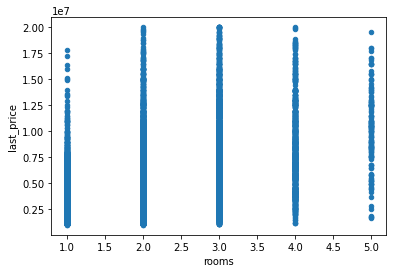

In [ ]:
data.plot(x='rooms', y='last_price', kind='scatter');

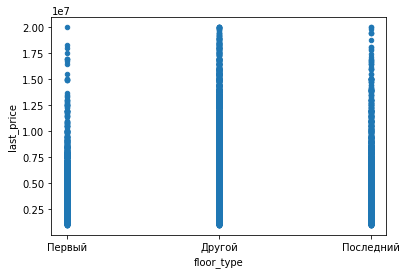

In [ ]:
data.plot(x='floor_type', y='last_price', kind='scatter');

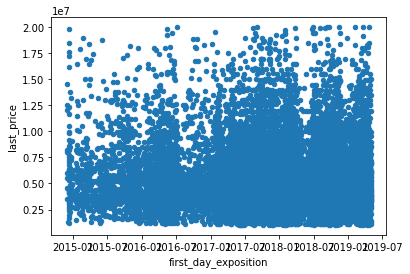

In [ ]:

data.plot(x='first_day_exposition', y='last_price', kind='scatter');

In [ ]:
data['day'] = data['first_day_exposition'].dt.day
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

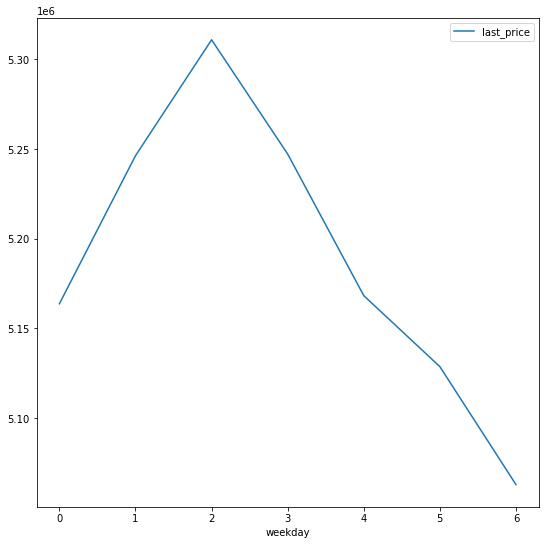

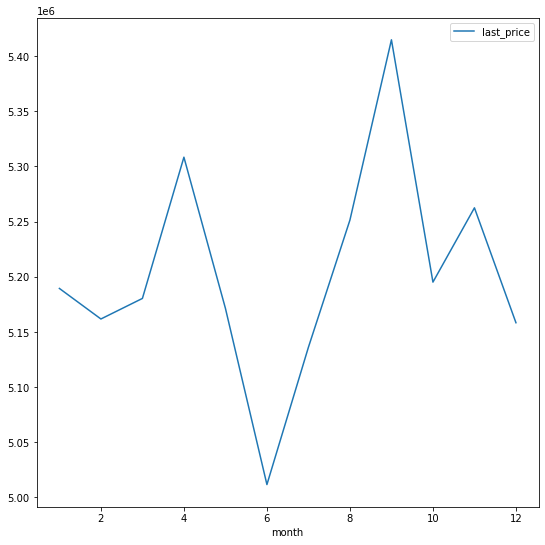

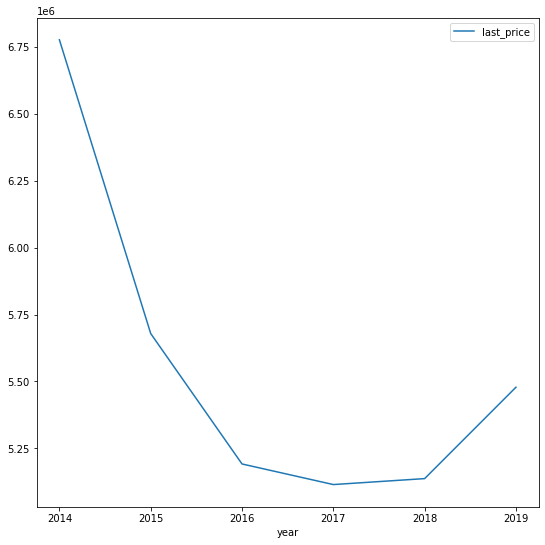

In [ ]:
data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'mean').plot(figsize = (9,9));
data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'mean').plot(figsize = (9,9));
data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'mean').plot(figsize = (9,9));
#data_pivot_weekday;
#data.plot(x='month', y='last_price', kind='bar', figsize = (9,9));
#data.plot(x='year', y='last_price', kind='bar', figsize = (9,9));
#data.plot(x='month', y='last_price', kind='scatter');
#data.plot(x='year', y='last_price', kind='scatter');

Судя по полученным графикам цена квартиры наиболее зависима от общей площади квартиры и соответственно жилой площади, кроме того, как оказалось, на первых этажах квартиры дешевле, возможно это связано с третьим фактором, например с общей площадью квартир. Цена у свежих объявлений, как правило выше, чем у давних. Это может быть связано с тем, что свежие объявления могут включать в себя квартиры в новостройках, которые, как правило, дороже, чем в более старых домах, а может быть связано с тем, что новые квартиры имеют большую площадь или расположены ближе к центру. Кроме того, те, кто уже несколько лет не могут продать квартиру пытаются сделать это за счет снижения окончательной цены. Остальные критерии мало влияют на окончательную цену. Даже количество комнат не влияет на стоимость жилья, что немного противоречиво, возможно это также связано с иными факторами. \
Средняя стоимость квартир, расположенных в четверг выше всего, квартиры, выложенные в начале и в конце недели одни из самых дешевых. Возможно, связано с тем, что на неделе выкладкой занимаются профессиональные агентства, а в выходные обычные пользователи. \
В сентябре выкладываются самые дорогие квартиры, самые дешевые в июне. \
Последний график указывает на то, что квартиры, выложенные в 2014 году самые дорогие, однако, если взглянуть на сводную таблицу, приведенную ниже, можно понять, что это не так, потому что в 2014 году было всего 84 объявления. Вероятнее всего это было жилье премиум класса или, возможно, продавцы решили, что по интернету можно завышать цены на жилье. Результаты 2017-2018 годов тоже не  совсем адекватные. Количество объявлений выросло с 3000 до почти до 8000, вероятно, на рынок интернет-торговли вышли большая часть риелторов и частников, и за счет огромного количества предложений обвалили цены на недвижимость. Кроме того, на все значения могут влиять такие параметры как: удаленность от города, категория этажей, столица/провинция, сезонность, тип жилья и другие, поэтому с полной уверенностью заявлять, что цена квартиры зависит от конечного набора параметров невозможно.

In [ ]:
data.pivot_table(index = 'year', values = ['total_area', 'living_area', 'last_price'], aggfunc = ['mean', 'count'])

mean                             count                       
        last_price living_area total_area last_price living_area total_area
year                                                                       
2014  6.776027e+06   38.793274  66.832262         84          84         84
2015  5.679018e+06   34.954812  60.238325        973         973        973
2016  5.191967e+06   32.311041  55.963706       2515        2515       2515
2017  5.115083e+06   31.487152  54.969312       7400        7400       7400
2018  5.137307e+06   30.863918  53.925417       7794        7794       7794
2019  5.478557e+06   31.269584  53.791500       2594        2594       2594

In [ ]:
data.loc[:,['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'floor', 'first_day_exposition']].corr()

,total_area,living_area,kitchen_area,last_price,rooms,floor
total_area,1.000000,0.937223,0.520808,0.745191,0.802738,-0.023571
living_area,0.937223,1.000000,0.291367,0.648199,0.885264,-0.117869
kitchen_area,0.520808,0.291367,1.000000,0.543908,0.133050,0.226945
last_price,0.745191,0.648199,0.543908,1.000000,0.469232,0.109026
rooms,0.802738,0.885264,0.133050,0.469232,1.000000,-0.166574
floor,-0.023571,-0.117869,0.226945,0.109026,-0.166574,1.000000


,count,mean
locality_name,,
Санкт-Петербург,13948,107681.811349
посёлок Мурино,519,84814.899756
посёлок Шушары,431,78384.171298
Всеволожск,376,67027.620928
Пушкин,335,101195.012737
Колпино,333,75350.495104
посёлок Парголово,318,90309.371325
Гатчина,301,68804.079740
деревня Кудрово,268,92758.919764


<AxesSubplot:xlabel='locality_name'>

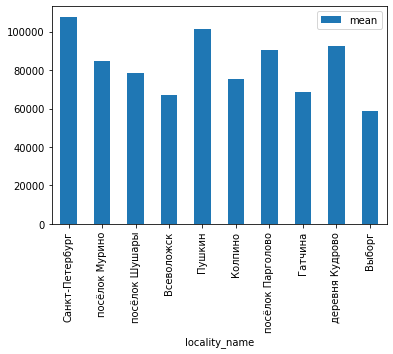

In [ ]:
data_pivot = \
data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = ['count', 'mean'])
data_pivot.columns = ('count', 'mean')
display(data_pivot.sort_values(by = 'count', ascending = False).head(10))
data_pivot.sort_values(by = 'count', ascending = False).head(10).plot(kind = 'bar', y = 'mean')

In [ ]:
display(data_pivot.loc[data_pivot['mean'] == data_pivot['mean'].max()])
display(data_pivot.loc[data_pivot['mean'] == data_pivot['mean'].min()])

,count,mean
locality_name,,
посёлок Лисий Нос,2,113728.34873


,count,mean
locality_name,,
посёлок Житково,1,15648.28614


<AxesSubplot:xlabel='cityCenters_nearest_km'>

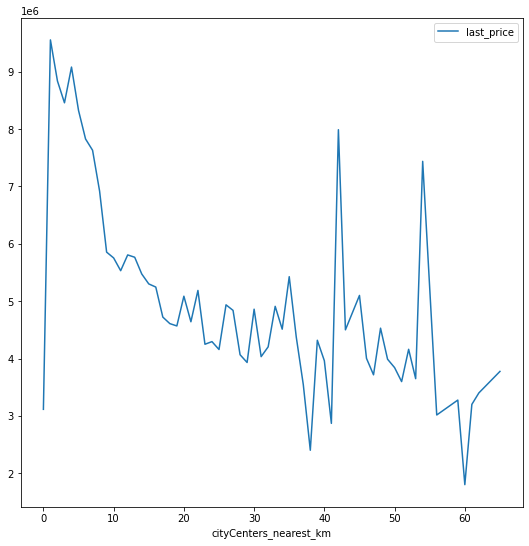

In [ ]:
data_price_per_km = data.pivot_table(index ='cityCenters_nearest_km', values = 'last_price')
data_price_per_km.plot(figsize = (9,9))

Судя по полученному графику наиболее дорогие квартиры, действительно, расположены поближе к центру города. Однако на графике видно 2 пика, первый в районе 43 километра от центра города, второй в районе 53 километра. Взглянем на таблицу в диапазоне от 40 до 60 километра.

In [ ]:
data_price_per_km[40:60]

,last_price
cityCenters_nearest_km,
40.0,3.961429e+06
41.0,2.868625e+06
42.0,7.990000e+06
43.0,4.500000e+06
45.0,5.100000e+06
46.0,4.002333e+06
47.0,3.715625e+06
48.0,4.528950e+06
49.0,3.987400e+06


In [ ]:
display(data.loc[(data['cityCenters_nearest_km'] == 42) | (data['cityCenters_nearest_km'] == 54)])
display(data.loc[(data['cityCenters_nearest_km'] == 42) | (data['cityCenters_nearest_km'] == 54),'is_apartment':'mean_categories'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,mean_categories,kitchen_area_ratio,mean_categories_kitchen,price_per_meter,weekday,month,year,floor_type,cityCenters_nearest_km,day
376,18,8400000.0,84.0,2018-06-26,2,2.750000,3,41.00,1,False,...,0.593305,0.154762,0.159293,100000.000000,1,6,2018,Первый,54.0,26
19984,20,7990000.0,62.2,2018-07-29,2,2.706238,6,32.79,6,False,...,0.593305,0.189389,0.159293,128456.591640,6,7,2018,Последний,42.0,29
22855,16,2950000.0,31.0,2018-03-07,1,2.700000,1,16.40,1,False,...,0.550380,0.180645,0.204969,95161.290323,2,3,2018,Первый,54.0,7
22941,8,10965000.0,69.3,2019-01-10,1,3.000000,4,48.90,4,True,...,0.593305,0.158730,0.159293,158225.108225,3,1,2019,Последний,54.0,10


,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category,living_area_ratio,mean_categories
376,False,False,False,13.00,0,Зеленогорск,73827.0,54926.0,0.0,0.0,0.0,NaN,201.0,b,0.488095,0.593305
19984,False,False,False,11.78,0,Сестрорецк,61872.0,42971.0,0.0,0.0,3.0,169.0,23.0,b,0.527170,0.593305
22855,False,False,False,5.60,0,Зеленогорск,73115.0,54214.0,3.0,188.0,1.0,269.0,328.0,a,0.529032,0.550380
22941,True,False,False,11.00,2,Зеленогорск,73391.0,54490.0,3.0,4.0,1.0,217.0,110.0,b,0.705628,0.593305


Как видно, на 42 километре всего 1 квартира, которая имеет площадь 84 метра, а на 54 километре находятся безумно дорогие квартиры, возможно, это жилье премиум класса или курортная

### Общий вывод

В работе было проведено исследование квартир по данным сервиса Яндекс недвижимость. Была проведена предобработка данных, заполнены пропуски, изменен тип данных в некоторых показателях, убраны аномалии и несостыковки. Выявлены закономерности касательно стоимости квартир в зависимости от их удаленности от центра города, общей площади, площади кухни и другие. Некоторые выводы оказались непредсказуемыми. Так, например, цена не зависела от количества комнат в квартире, а площадь кухни почти не зависела от площади квартиры.
В центре Питера было обнаружено большое количество недорогих квартир. Эти данные стоит изучить в последующих исследованиях. Может быть, действительно, в центре второго города после Москвы есть недорогое жилье.